<a href="https://colab.research.google.com/github/gagan3754/-Walmart---Confidence-Interval-and-CLT/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/walmart_data.csv")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Occupation']=df['Occupation'].astype('object')
df['Marital_Status']=df['Marital_Status'].astype('object')
df['Product_Category']=df['Product_Category'].astype('object')
df['User_ID']=df['User_ID'].astype('object')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


#Value counts and unique attributes ​

In [ ]:
for i in df.columns:
  print('Value count of',i)
  print(df[i].value_counts())
  print("-"*70)

Value count of User_ID
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64
----------------------------------------------------------------------
Value count of Product_ID
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64
----------------------------------------------------------------------
Value count of Gender
Gender
M    414259
F    135809
Name: count, dtype: int64
----------------------------------------------------------------------
Value count of Age
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
-------------------------

In [ ]:
#unique attributes
for i in df.columns:
  print('Unique values of',i)
  print(df[i].unique())
  print("-"*70)

Unique values of User_ID
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
----------------------------------------------------------------------
Unique values of Product_ID
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
----------------------------------------------------------------------
Unique values of Gender
['F' 'M']
----------------------------------------------------------------------
Unique values of Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
----------------------------------------------------------------------
Unique values of Occupation
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
----------------------------------------------------------------------
Unique values of City_Category
['A' 'C' 'B']
----------------------------------------------------------------------
Unique values of Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
----------------------------------------------------------------------
Unique value

#Visual Analysis - Univariate & Bivariate


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#Countplot

In [ ]:
# countplot for Gender

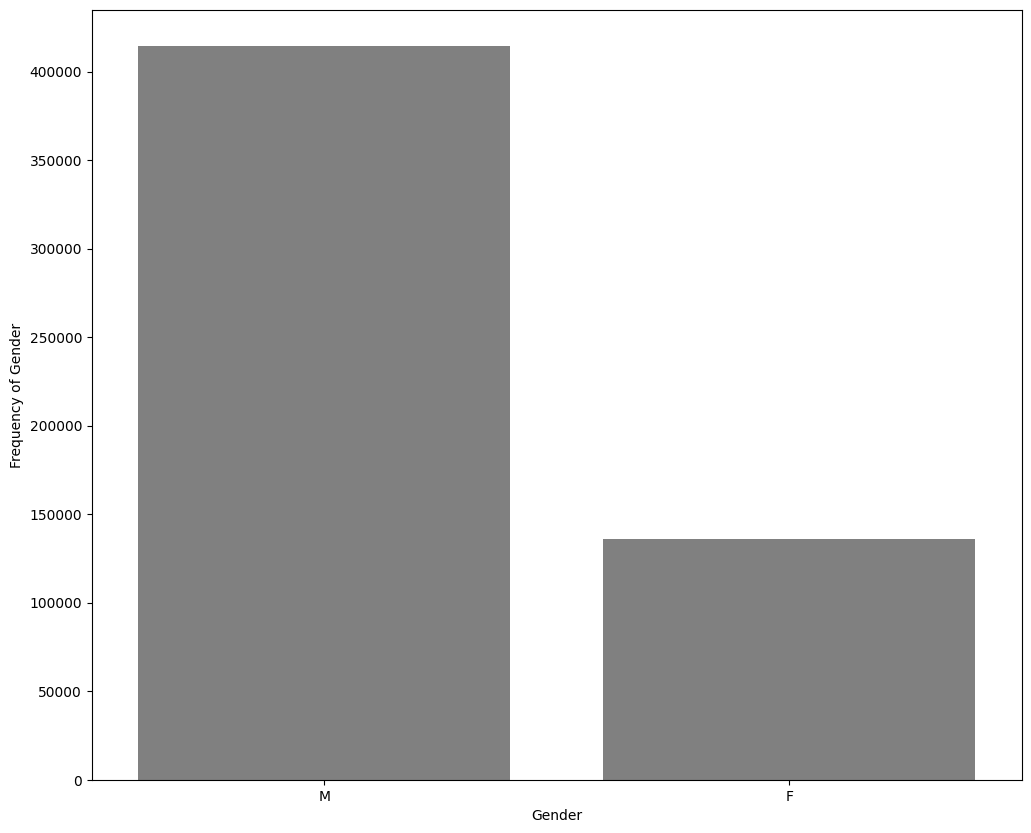

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df,x='Gender',order=df['Gender'].value_counts().index,color='grey')
plt.xlabel('Gender')
plt.ylabel('Frequency of Gender')
plt.show()

In [ ]:
# countplot for Age

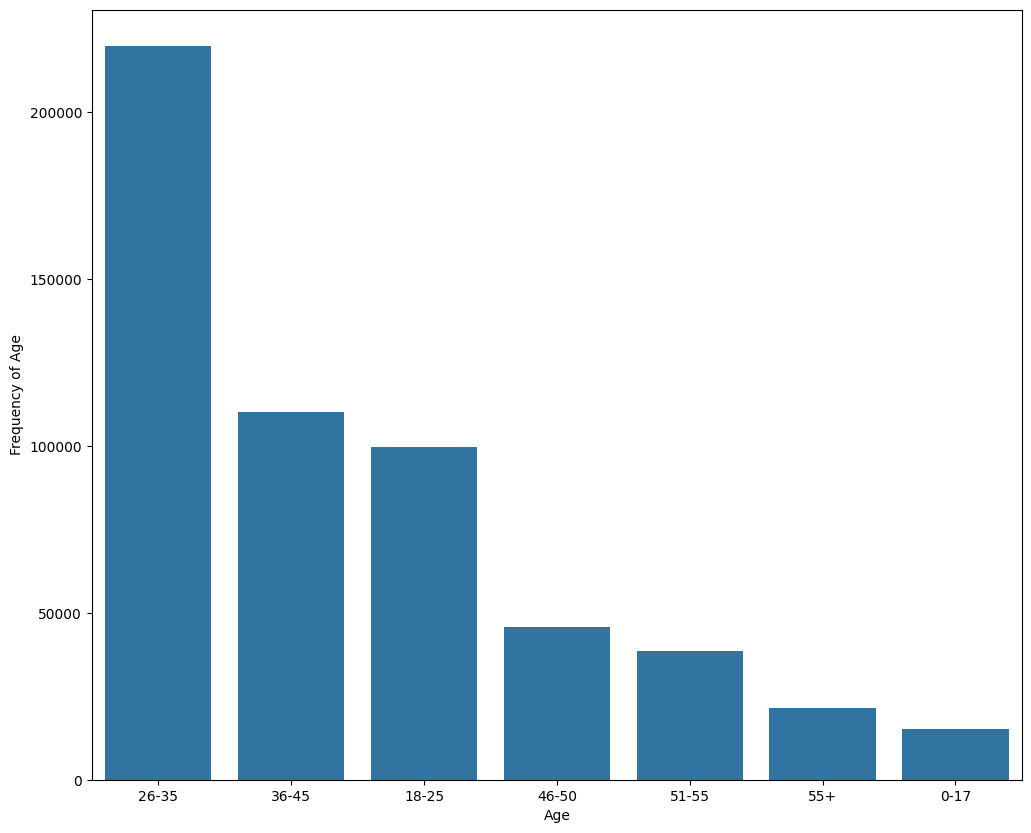

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df,x='Age',order=df['Age'].value_counts().index)
plt.xlabel('Age')
plt.ylabel('Frequency of Age')
plt.show()

In [ ]:
# countplot for marital status

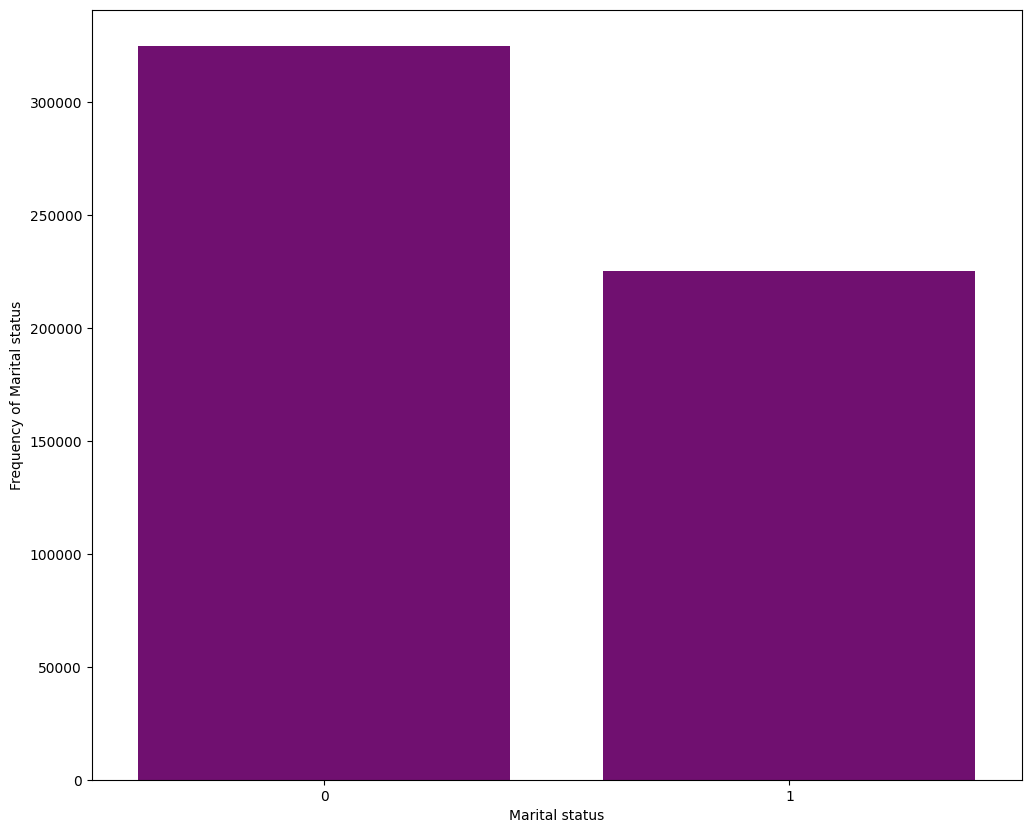

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df,x='Marital_Status',order=df['Marital_Status'].value_counts().index,color='purple')
plt.xlabel('Marital status')
plt.ylabel('Frequency of Marital status')
plt.show()

In [ ]:
# countplot for product category

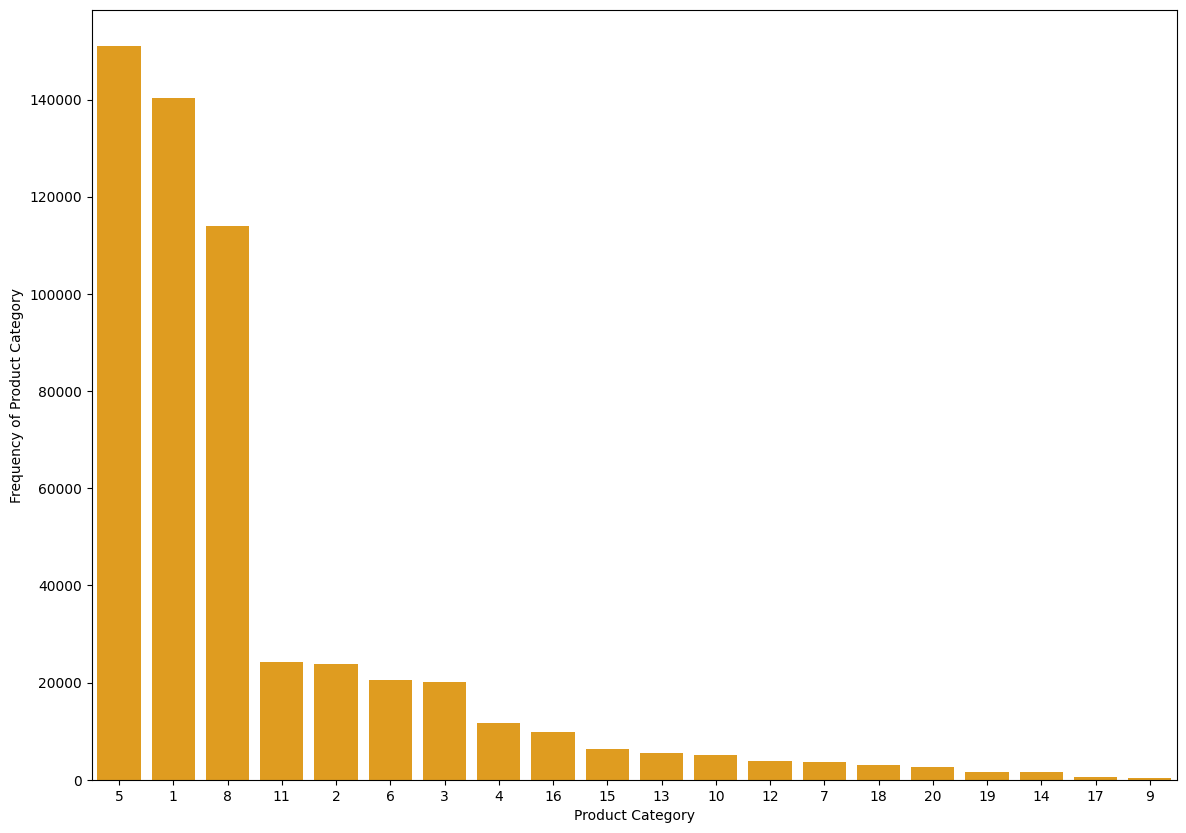

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='Product_Category',order=df['Product_Category'].value_counts().index,color='orange')
plt.xlabel('Product Category')
plt.ylabel('Frequency of Product Category')
plt.show()

In [ ]:
# countplot for Occupation

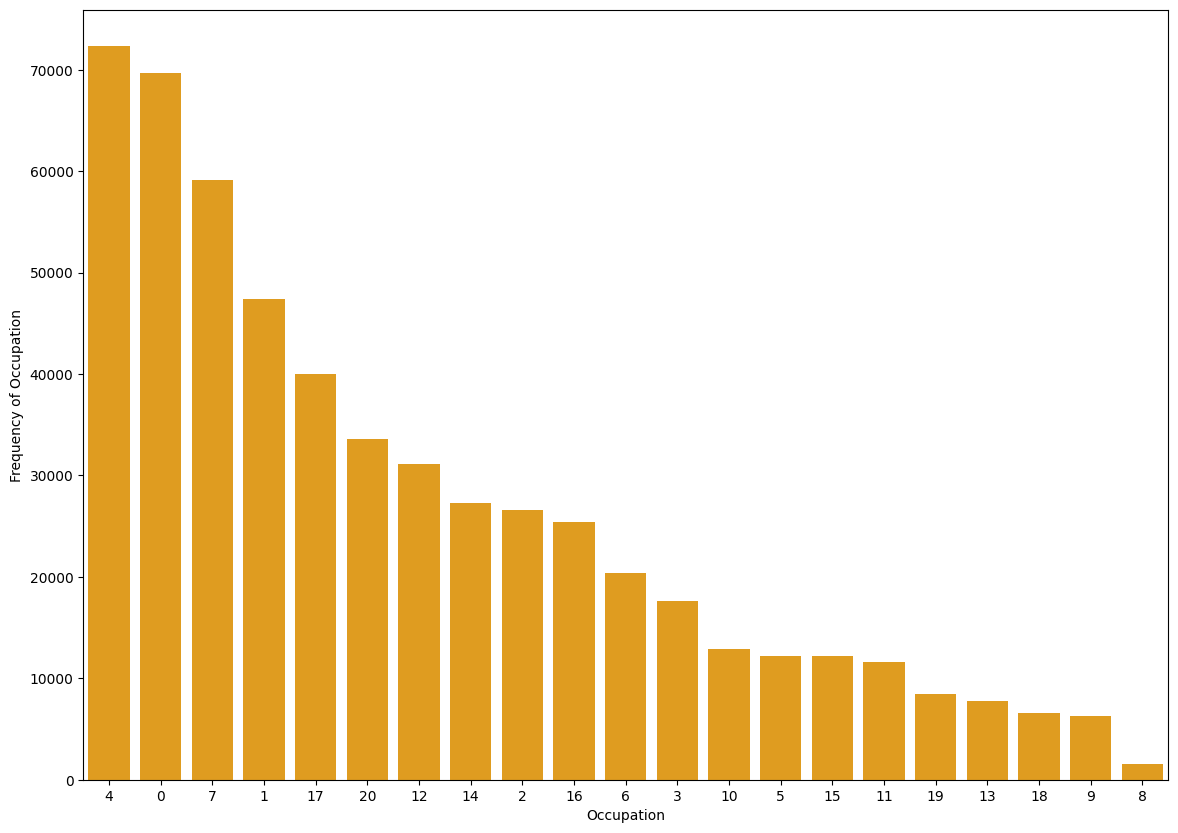

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='Occupation',order=df['Occupation'].value_counts().index,color='orange')
plt.xlabel('Occupation')
plt.ylabel('Frequency of Occupation')
plt.show()

# Univariate Histogram

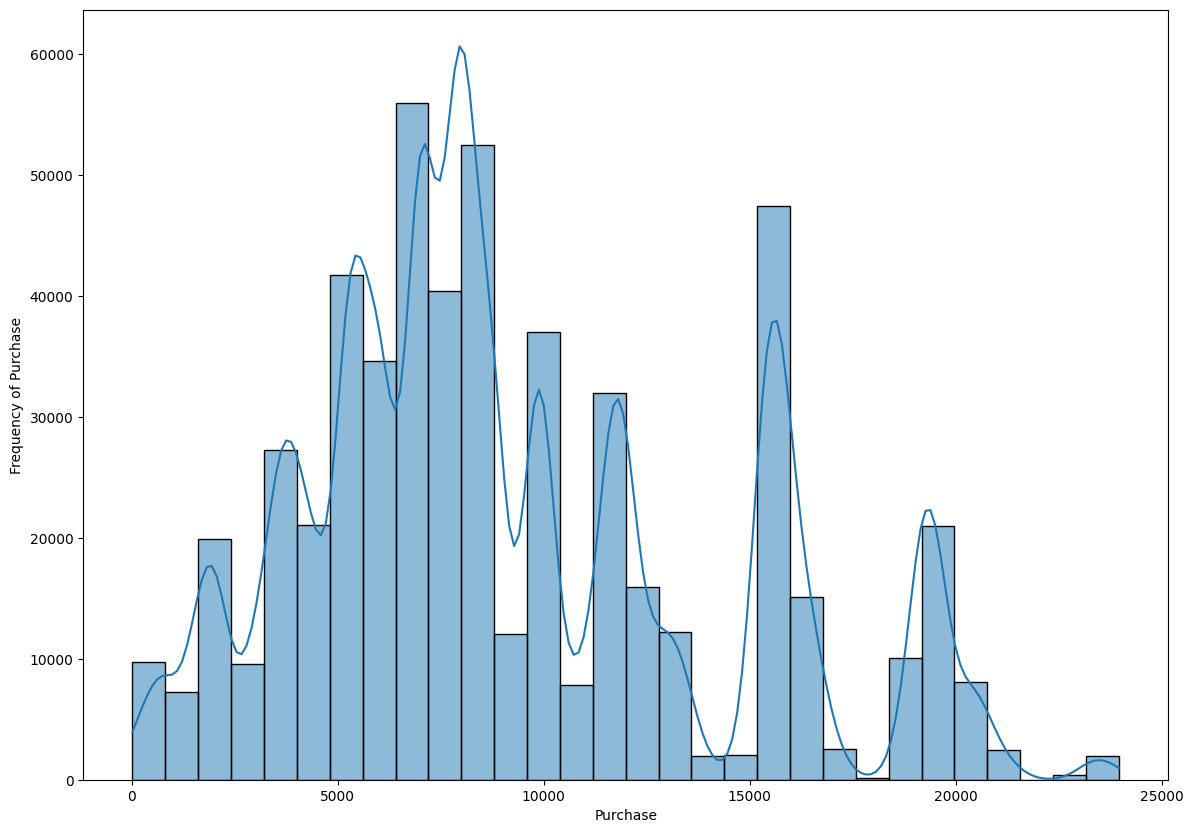

In [ ]:
plt.figure(figsize=(14,10))
sns.histplot(df,x='Purchase',bins=30,kde=True)
plt.xlabel('Purchase')
plt.ylabel('Frequency of Purchase')
plt.show()

#Univariate Distplot

<ipython-input-582-be349d474f48>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'])


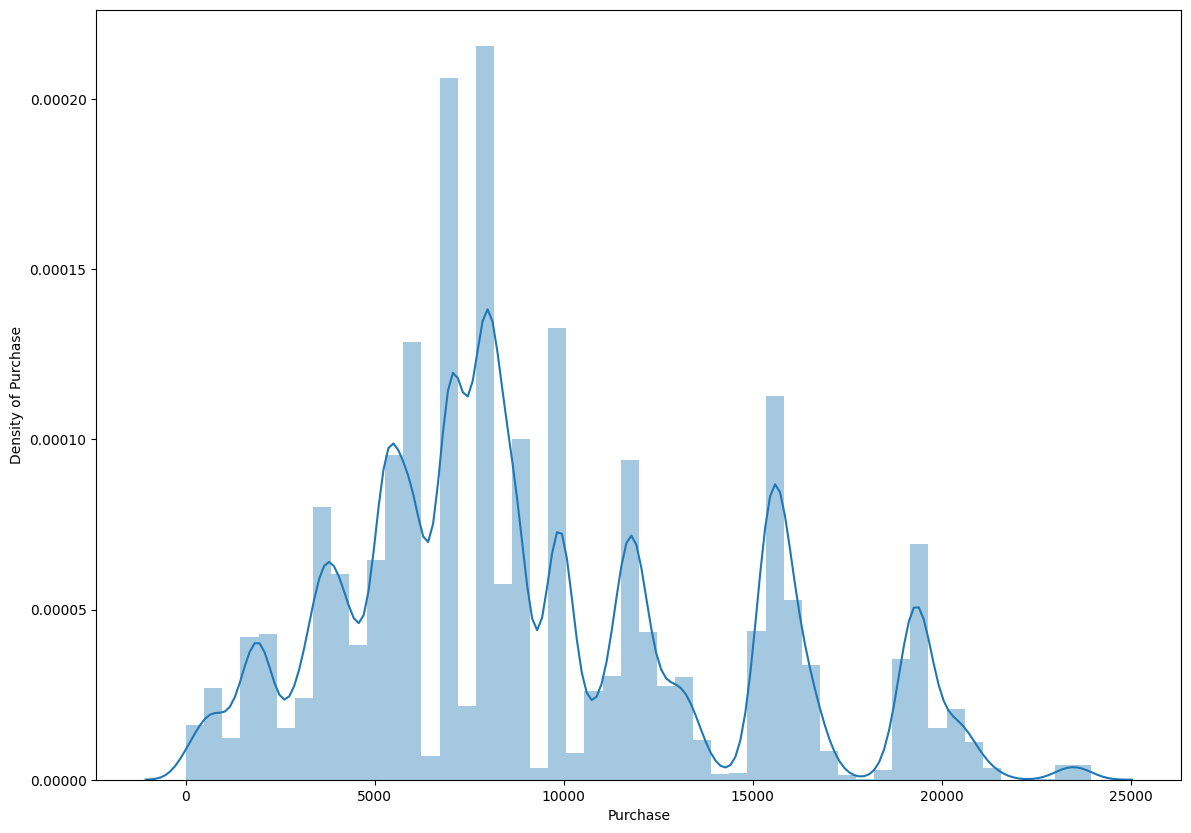

In [ ]:
plt.figure(figsize=(14,10))
sns.distplot(df['Purchase'])
plt.xlabel('Purchase')
plt.ylabel('Density of Purchase')
plt.show()

#Univariate analysis Boxplot

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Marital_Status'>

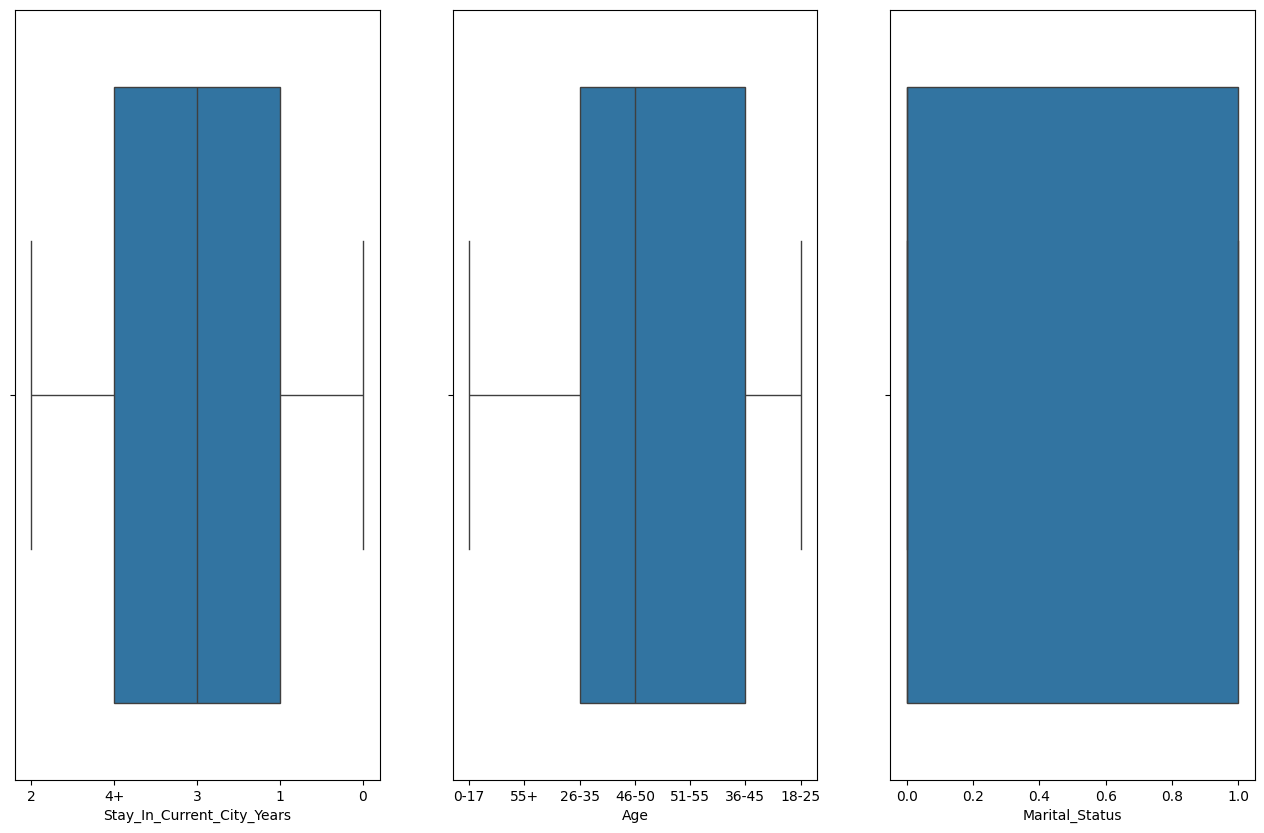

In [ ]:
figure,axis=plt.subplots(nrows=1,ncols=3,figsize=(16,10))
sns.boxplot(df,x='Stay_In_Current_City_Years',ax=axis[0])
sns.boxplot(df,x='Age',ax=axis[1])
sns.boxplot(df,x='Marital_Status',ax=axis[2])

In [ ]:
# boxplot for purchase

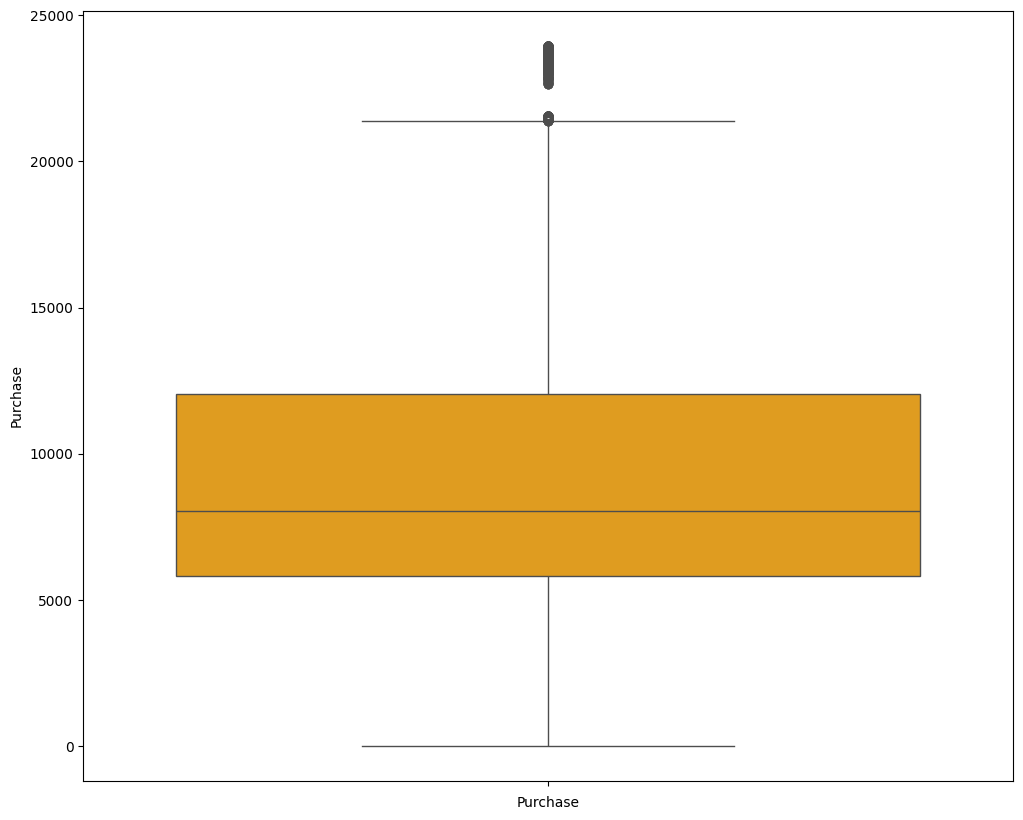

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(df,y='Purchase',color='orange')
plt.xlabel('Purchase')
plt.show()

# Bivariate Analysis

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#Bivariate analysis using countplot

In [ ]:
#Distribution of Age by Gender

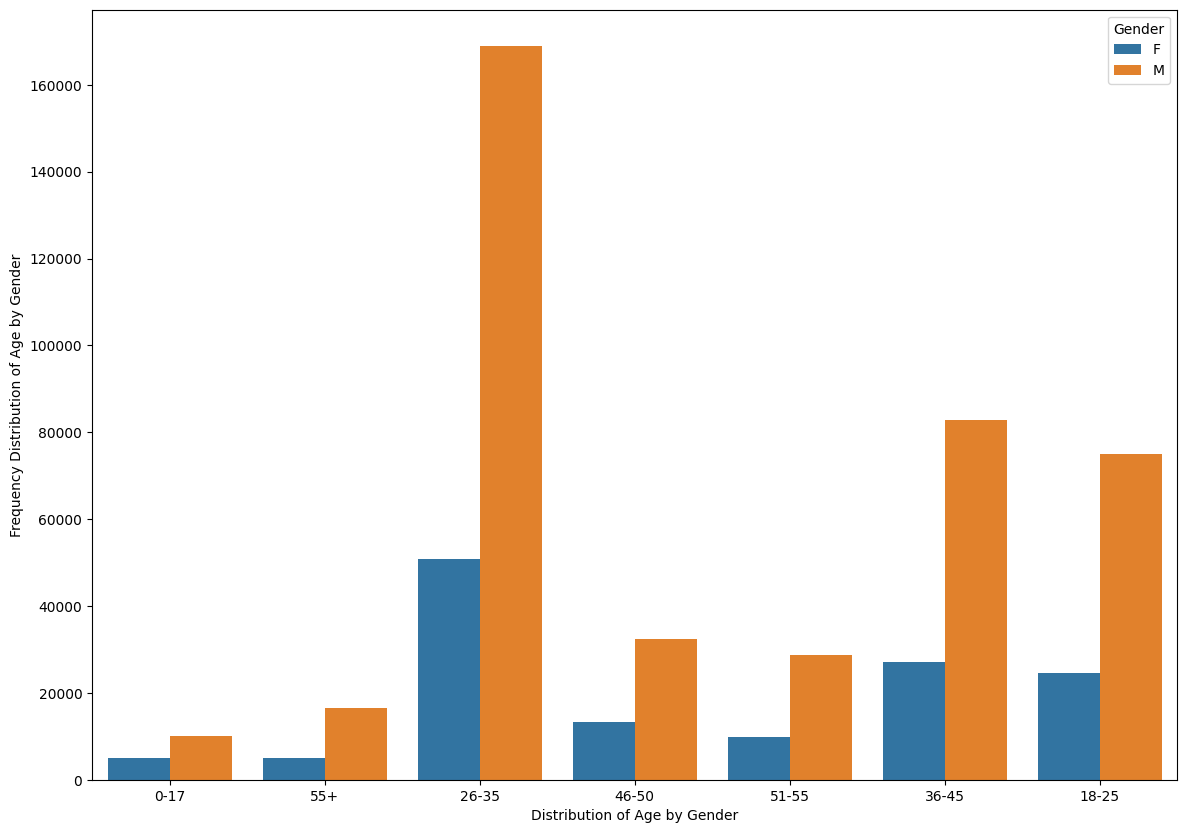

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='Age',hue='Gender')
plt.xlabel('Distribution of Age by Gender')
plt.ylabel('Frequency Distribution of Age by Gender')
plt.show()

In [ ]:
#Distribution of Occupation by Gender

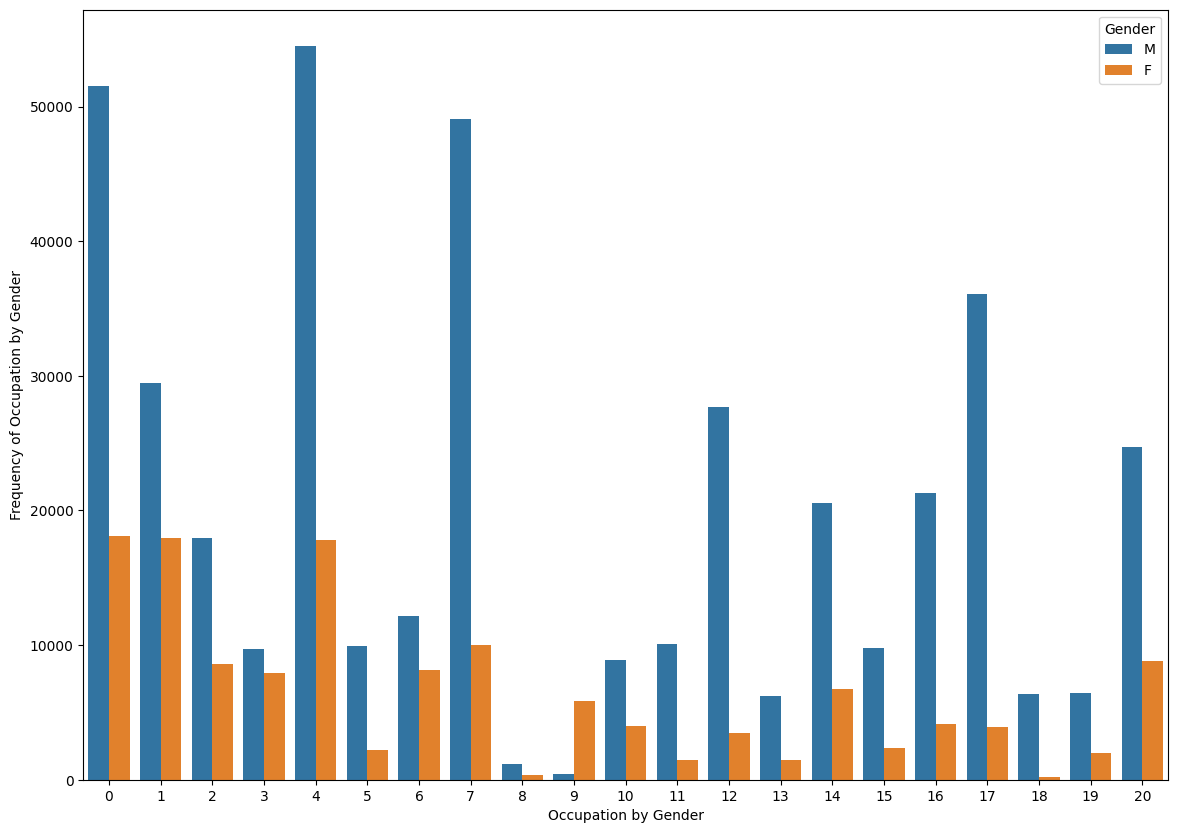

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='Occupation',hue='Gender')
plt.xlabel('Occupation by Gender')
plt.ylabel('Frequency of Occupation by Gender')
plt.show()

In [ ]:
#Distribution of city category by Gender

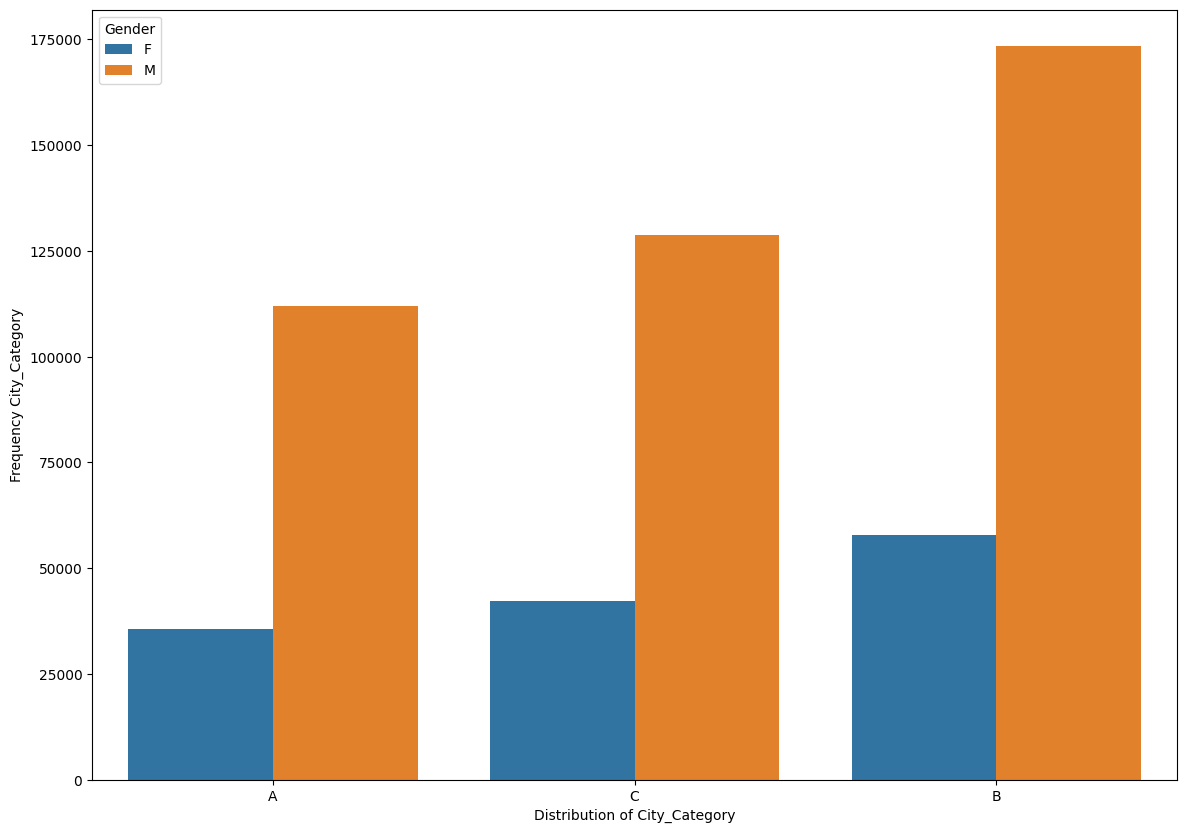

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='City_Category',hue='Gender')
plt.xlabel('Distribution of City_Category')
plt.ylabel('Frequency City_Category')
plt.show()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Distribution of Marital_Status based on Gender

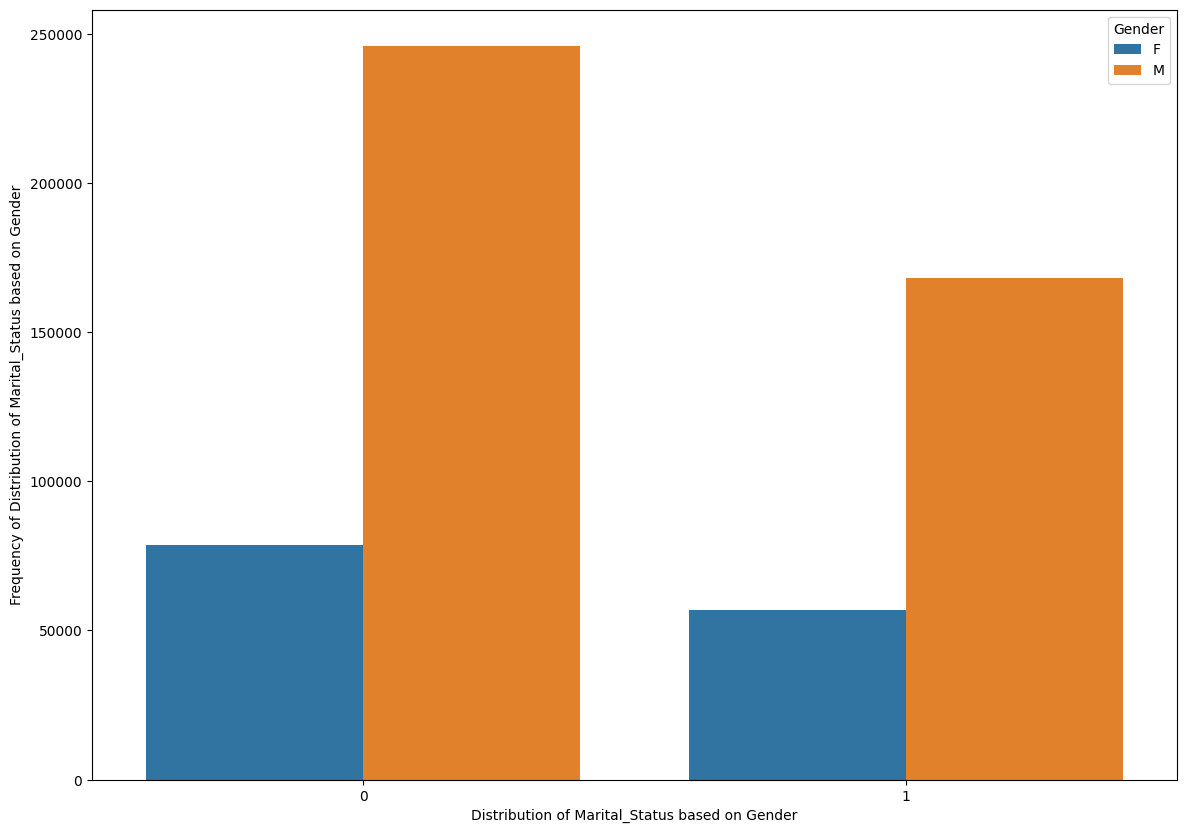

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='Marital_Status',hue='Gender')
plt.xlabel('Distribution of Marital_Status based on Gender')
plt.ylabel('Frequency of Distribution of Marital_Status based on Gender')
plt.show()

In [ ]:
#Distribution of product category based on Gender

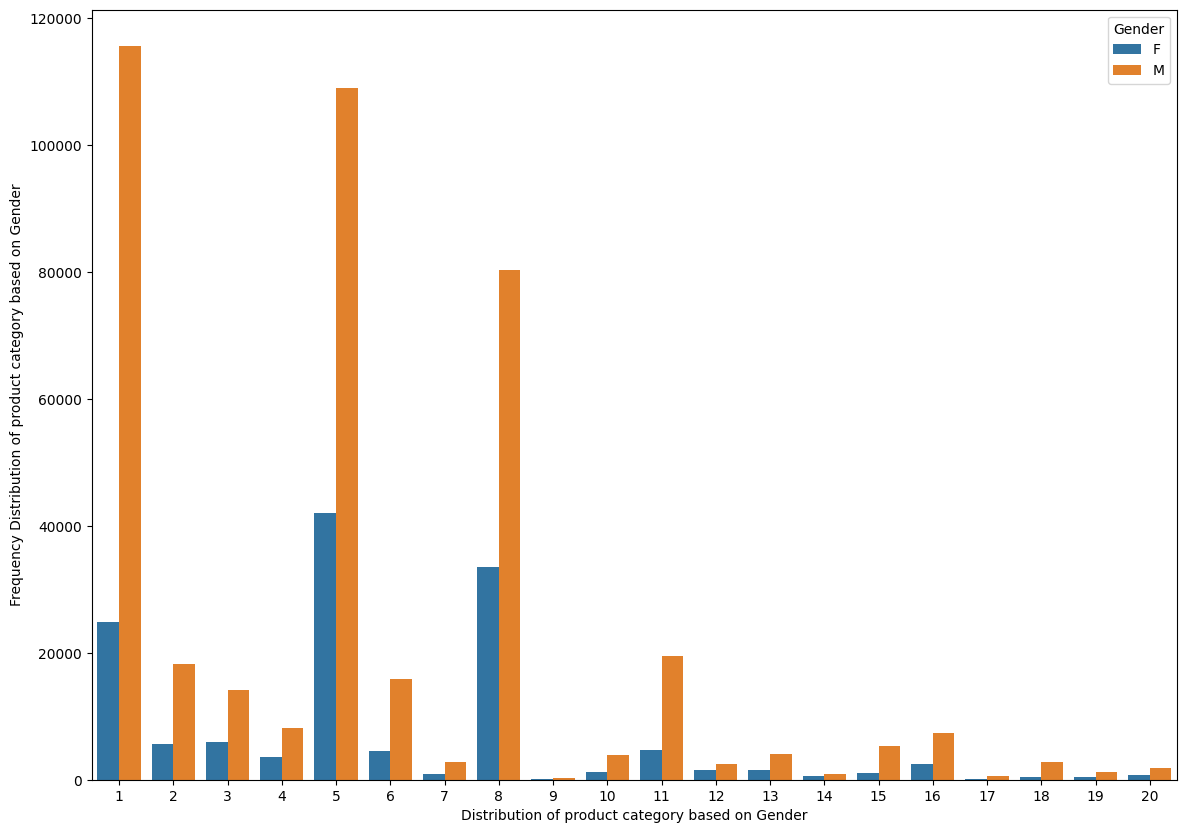

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(df,x='Product_Category',hue='Gender')
plt.xlabel('Distribution of product category based on Gender')
plt.ylabel('Frequency Distribution of product category based on Gender')
plt.show()

Bivariate analysis using barplot

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#purchase vs Product_Category

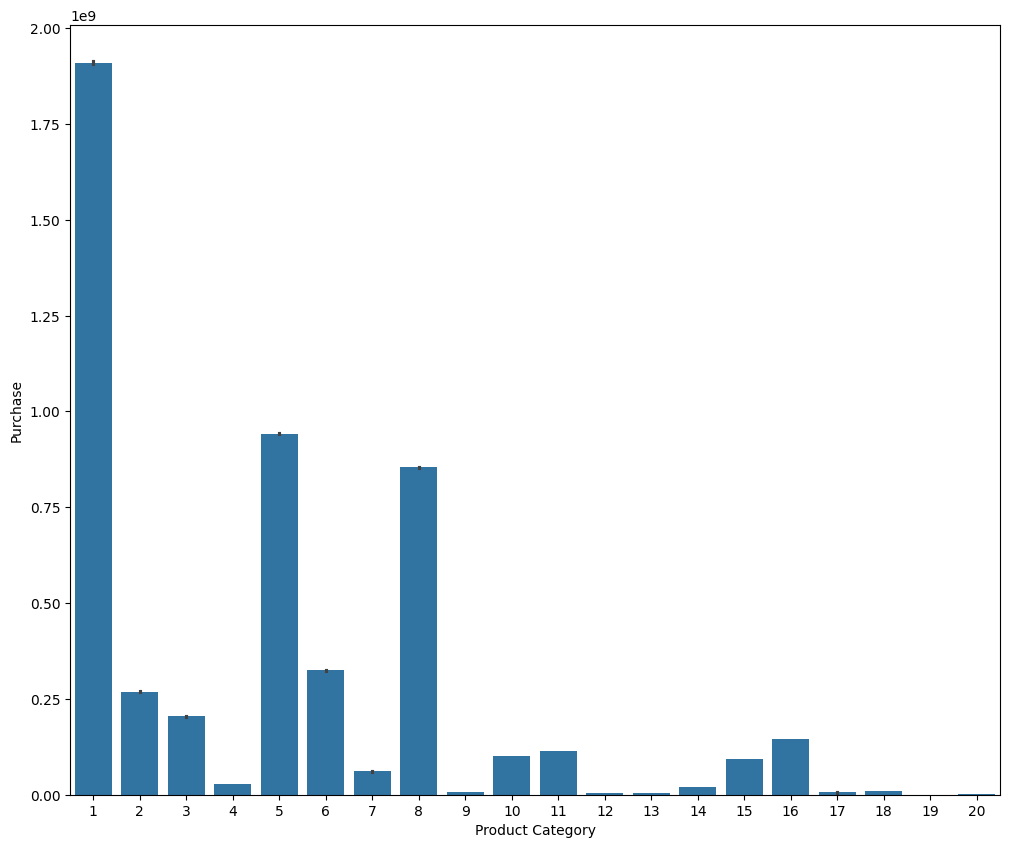

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(df,x='Product_Category',y='Purchase',estimator=np.sum)
plt.xlabel('Product Category')
plt.ylabel('Purchase')
plt.show()

In [ ]:
# Purchase based on Gender

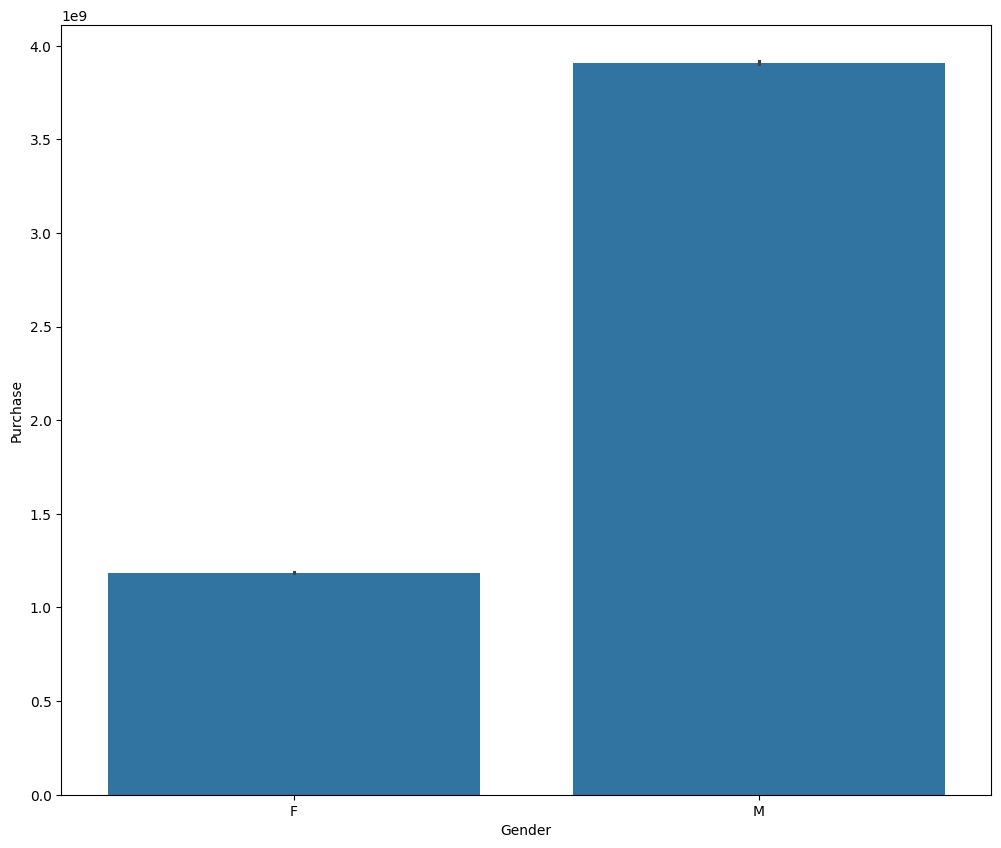

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(df,x='Gender',y='Purchase',estimator=np.sum)
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#Purchase based of Age

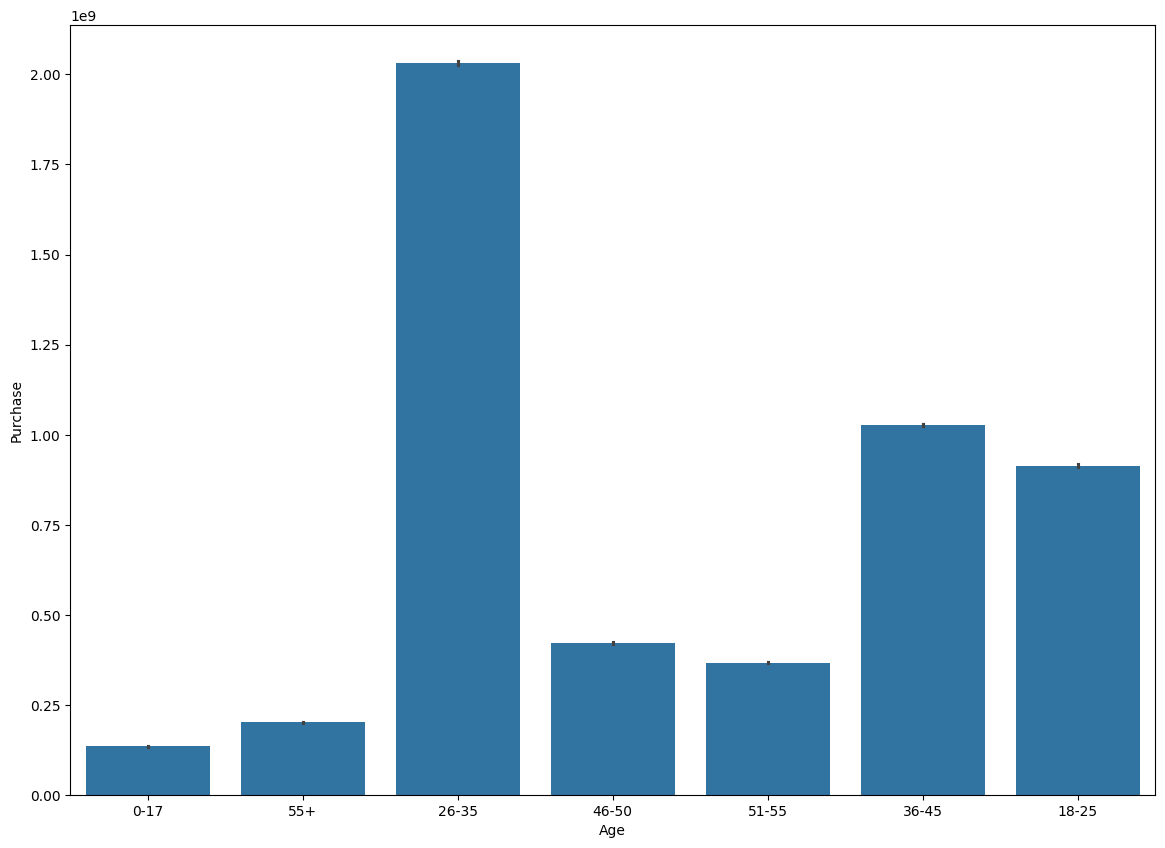

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(df,x='Age',y='Purchase',estimator=np.sum)
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#purchase based on Marital status

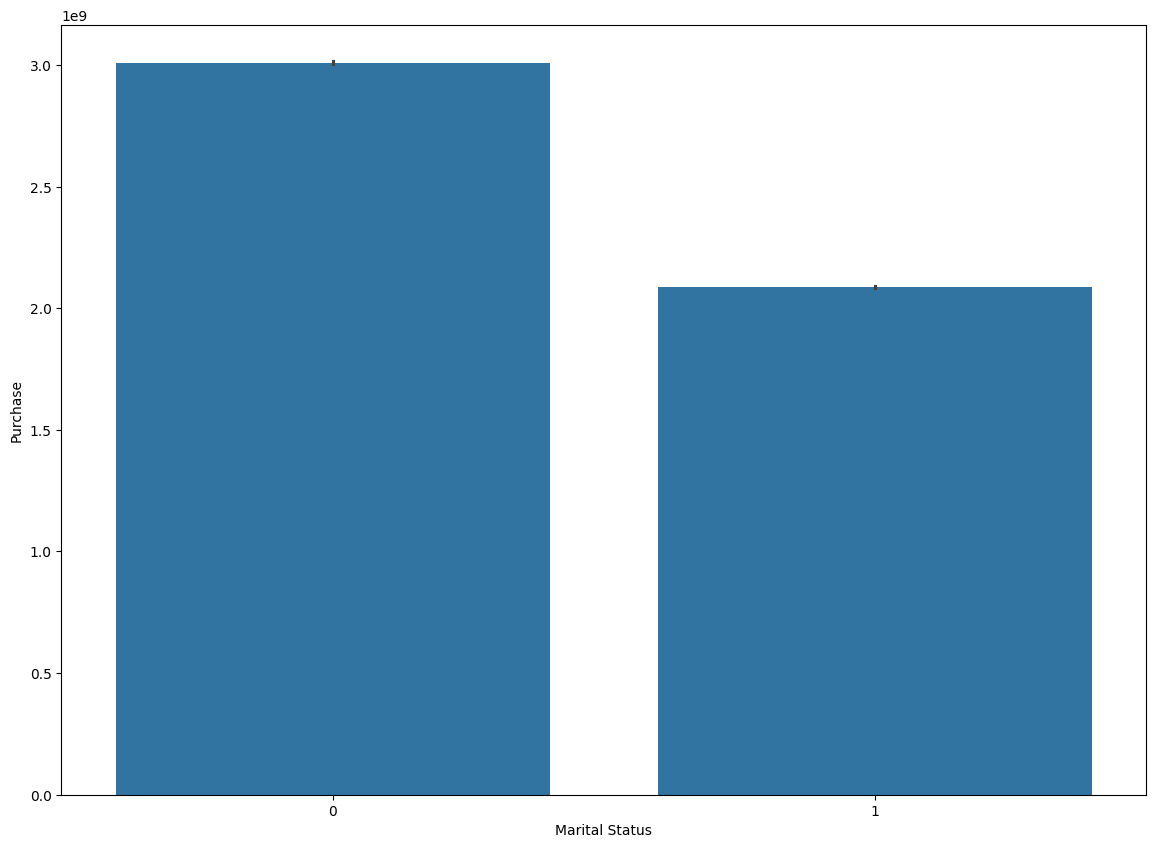

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(df,x='Marital_Status',y='Purchase',estimator=np.sum)
plt.xlabel('Marital Status')
plt.ylabel('Purchase')
plt.show()

Bivariate boxplot analysis Boxplot

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Boxplot Age vs purchase

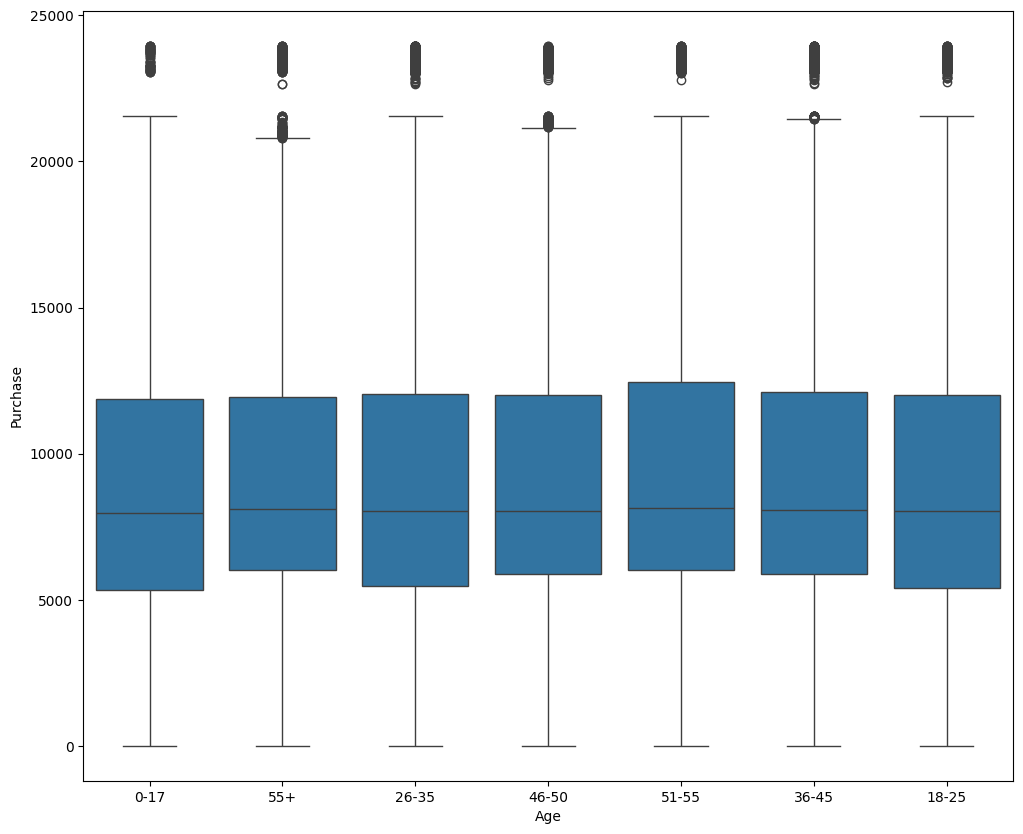

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(df,x='Age',y='Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#Boxplot Occupation vs purchase

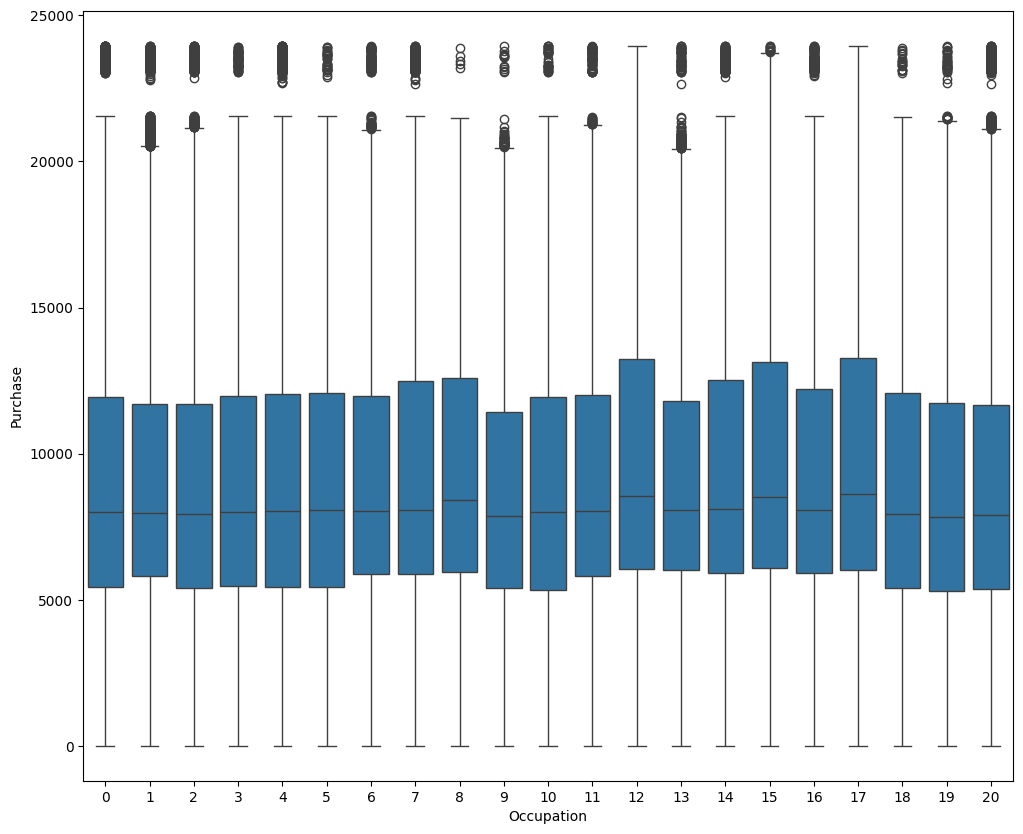

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(df,x='Occupation',y='Purchase')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#Boxplot Marital status vs purchase

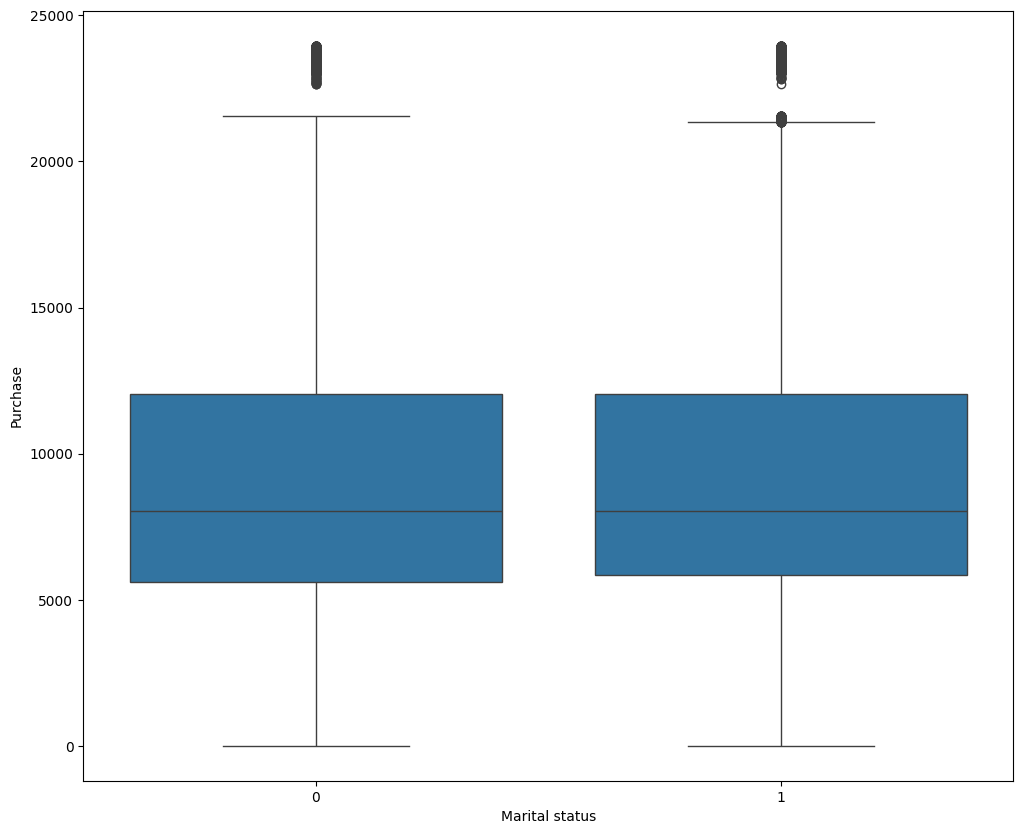

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(df,x='Marital_Status',y='Purchase')
plt.xlabel('Marital status')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#Boxplot Product_Category vs purchase

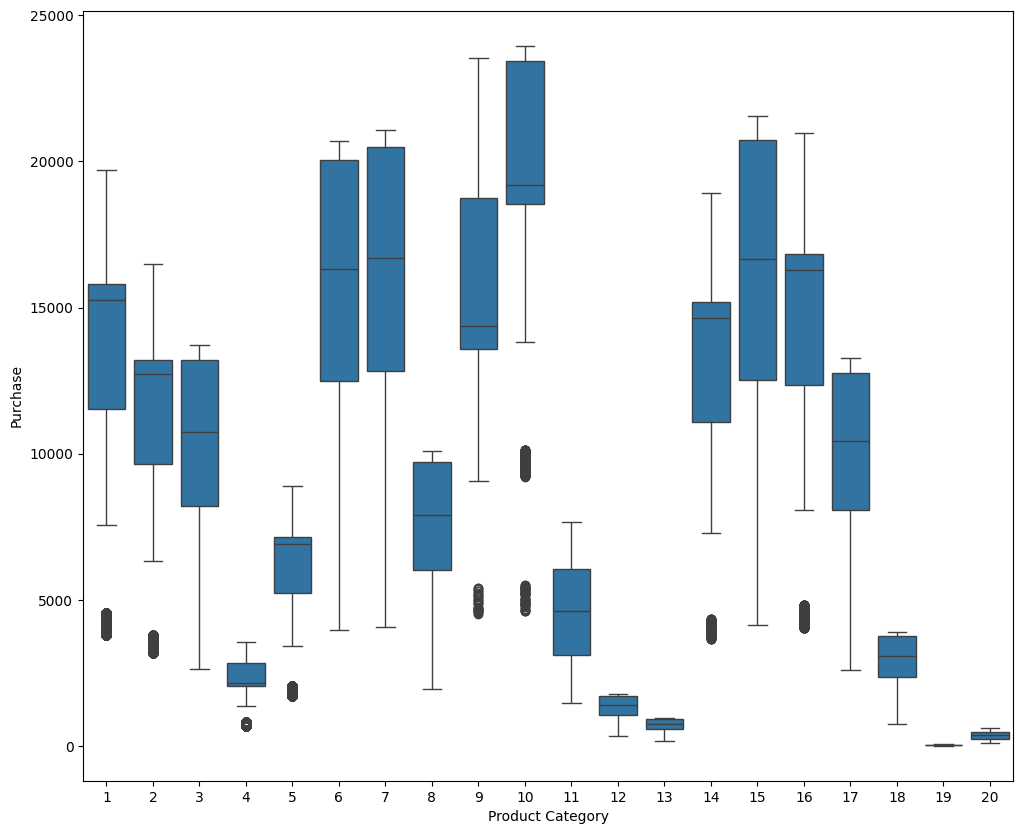

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(df,x='Product_Category',y='Purchase')
plt.xlabel('Product Category')
plt.ylabel('Purchase')
plt.show()

#Multi Variate Analysis

In [ ]:
# Purchase by age based on gender

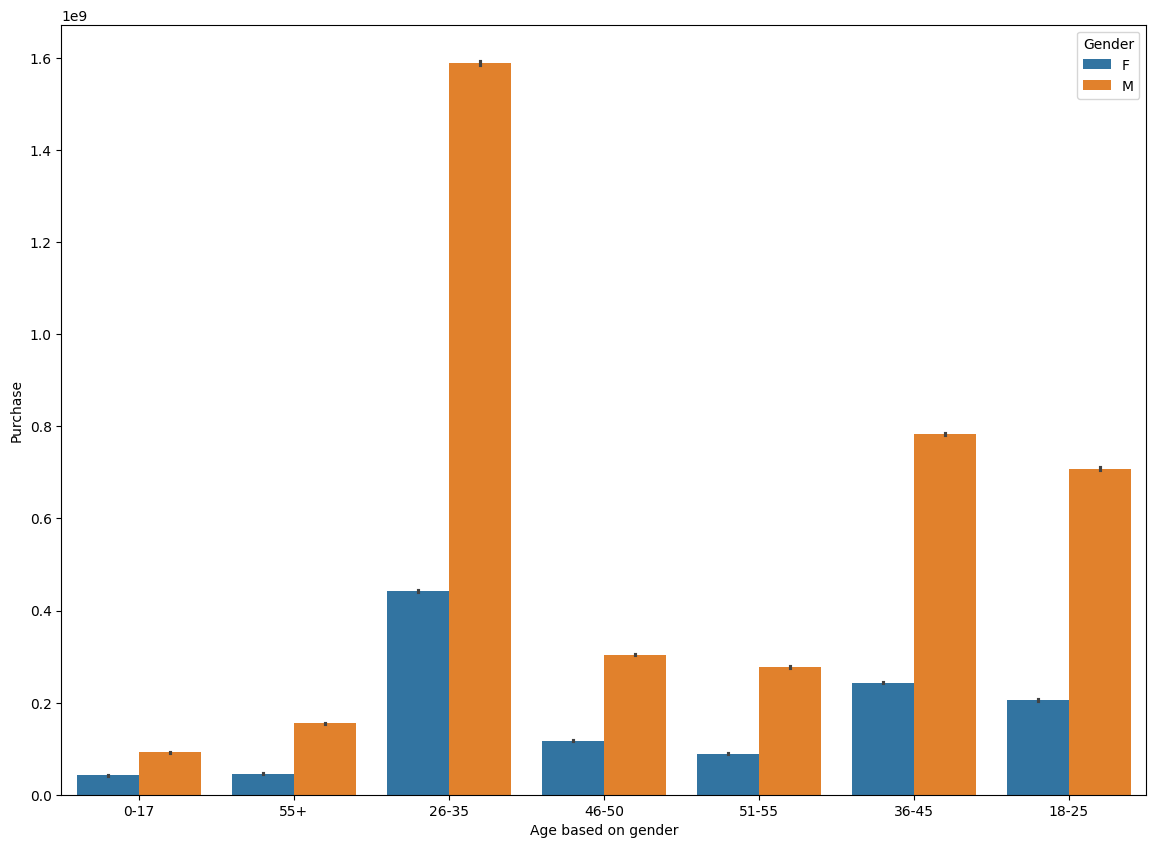

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(df,x='Age',y='Purchase',hue='Gender',estimator=np.sum)
plt.xlabel('Age based on gender')
plt.ylabel('Purchase')
plt.show()

In [ ]:
# Average Purchase by age based on gender

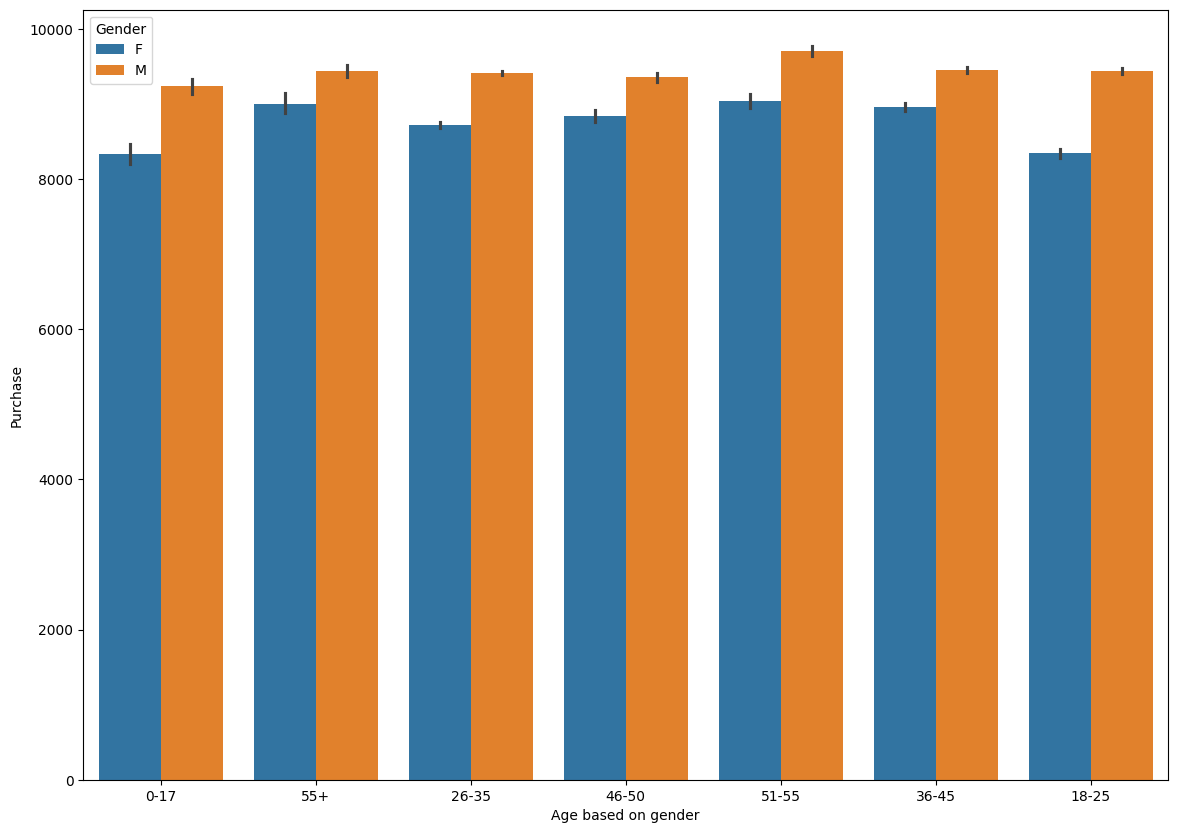

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(df,x='Age',y='Purchase',hue='Gender',estimator=np.mean)
plt.xlabel('Age based on gender')
plt.ylabel('Purchase')
plt.show()

In [ ]:
# Purchase by Marital status based on gender

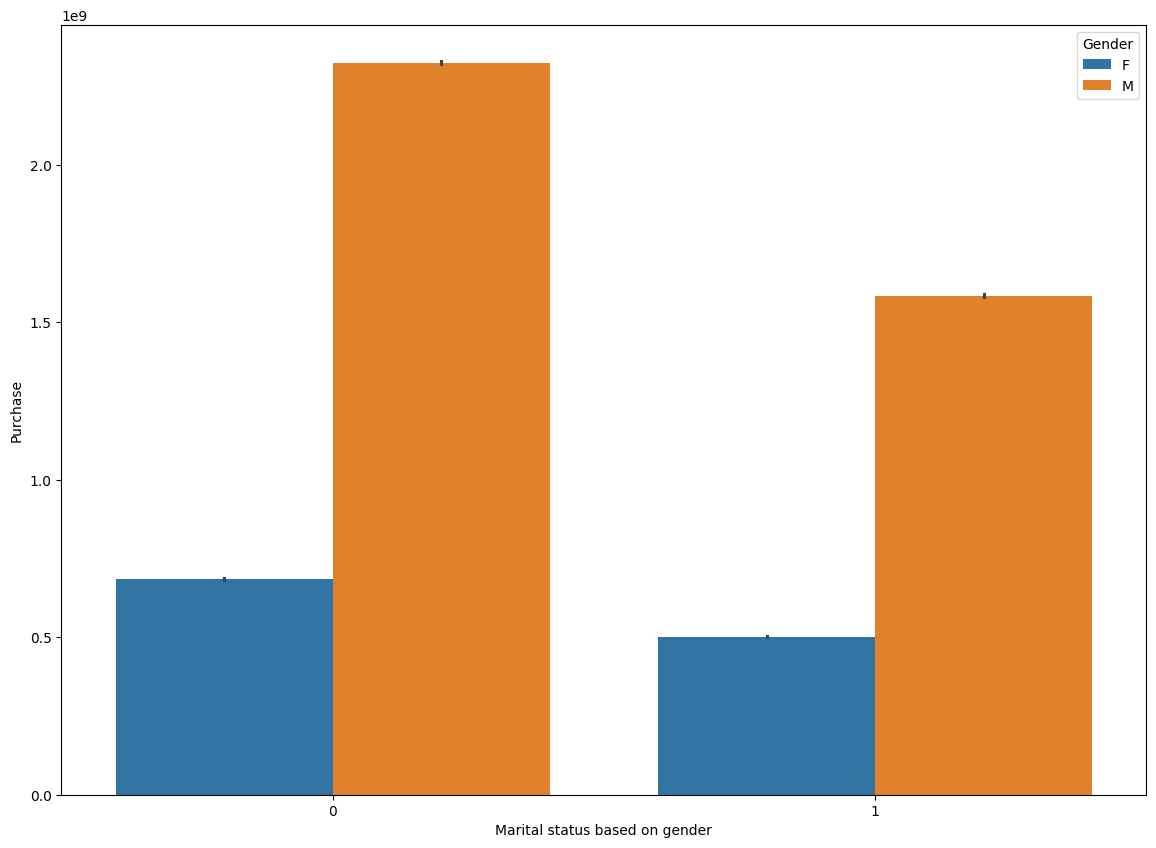

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(df,x='Marital_Status',y='Purchase',hue='Gender',estimator=np.sum)
plt.xlabel('Marital status based on gender')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#Average Purchase by Marital status based on gender

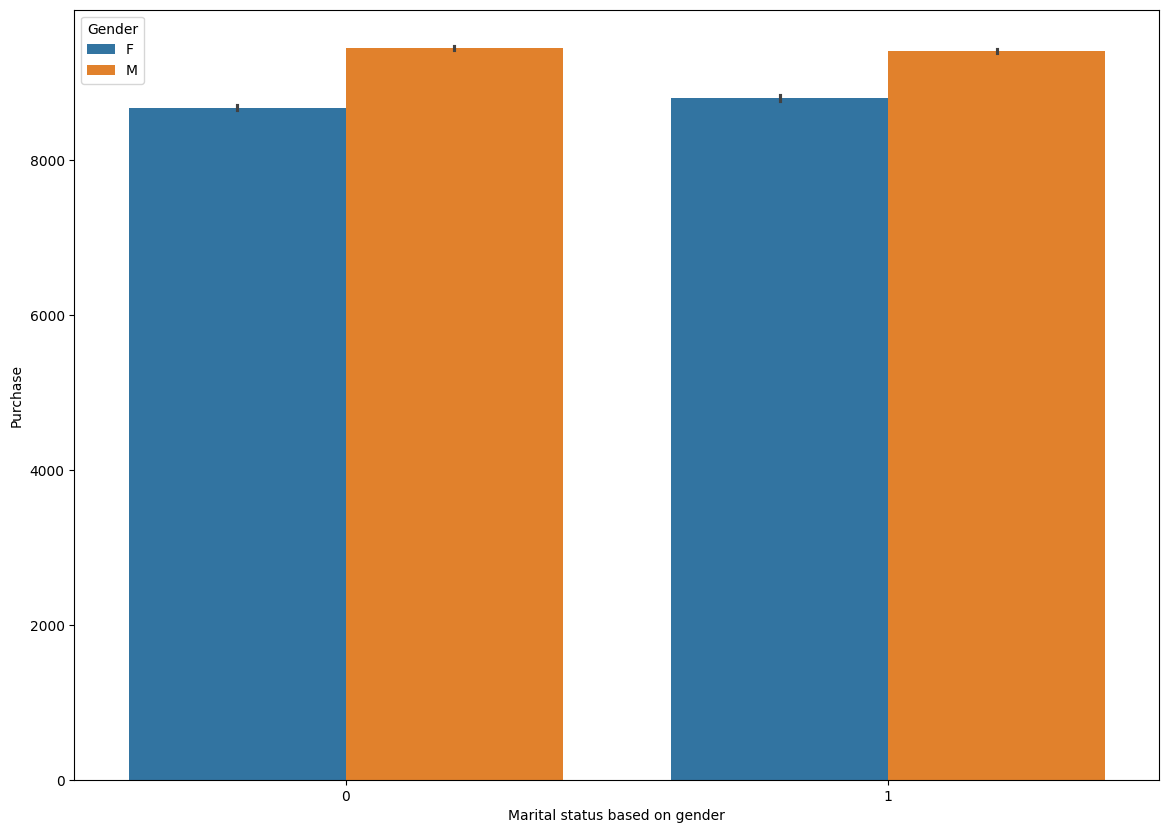

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(df,x='Marital_Status',y='Purchase',hue='Gender',estimator=np.mean)
plt.xlabel('Marital status based on gender')
plt.ylabel('Purchase')
plt.show()

Multi variate using Boxplot

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Gender', ylabel='Purchase'>

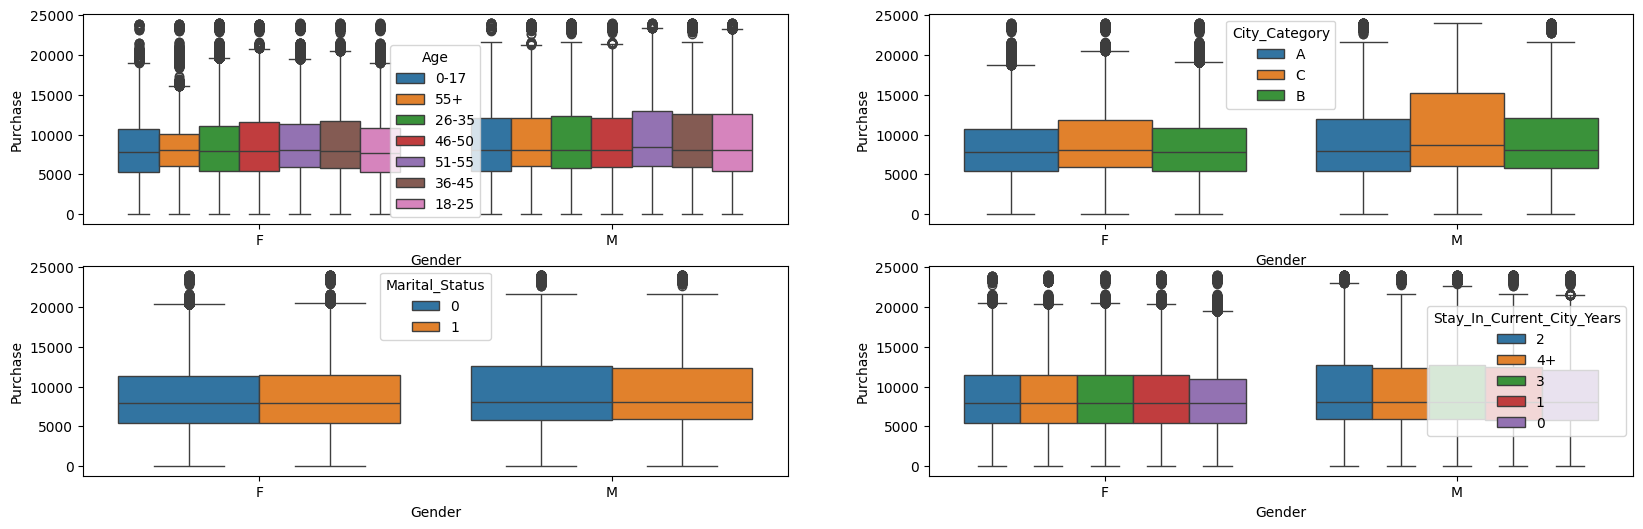

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

sns.boxplot(df,y='Purchase',x='Gender',hue='Age',ax=axis[0,0])
sns.boxplot(df,y='Purchase',x='Gender',hue='City_Category',ax=axis[0,1])
sns.boxplot(df,y='Purchase',x='Gender',hue='Marital_Status',ax=axis[1,0])
sns.boxplot(df,y='Purchase',x='Gender',hue='Stay_In_Current_City_Years',ax=axis[1,1])

#Pairplot

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(df)

#Checking how the data is spread basis distinct users


In [ ]:
df.head()

In [ ]:
h=df.groupby('User_ID')['Age'].unique()

In [ ]:
h

In [ ]:
(h.value_counts()/len(h))*100

,count
City_Category,
[C],53.284672
[B],28.976405
[A],17.738924


    1. We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.
    2. From the previous observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent  customers.

In [ ]:
h=df.groupby('User_ID')['Gender'].unique()

In [ ]:
(h.value_counts()/len(h))*100

1. We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.



In [ ]:
h=df.groupby('User_ID')['Marital_Status'].unique()

In [ ]:
(h.value_counts()/len(h))*100

,count
City_Category,
[C],53.284672
[B],28.976405
[A],17.738924


 We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.

In [ ]:
h=df.groupby('User_ID')['City_Category'].unique()

In [ ]:
(h.value_counts()/len(h))*100

,count
City_Category,
[C],53.284672
[B],28.976405
[A],17.738924


53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.



#Checking the age group distribution in different city categories

We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.

In [ ]:
pd.crosstab(df['Age'],df['City_Category'],margins=True,normalize='index')

City_Category,A,B,C
Age,,,
0-17,0.168455,0.359886,0.471659
18-25,0.276289,0.433945,0.289765
26-35,0.335835,0.417074,0.247091
36-45,0.241944,0.432658,0.325398
46-50,0.166451,0.446511,0.387037
51-55,0.158411,0.460793,0.380795
55+,0.166155,0.240048,0.593797
All,0.268549,0.420263,0.311189


In [ ]:
#Checking how purchase value are spread among differnt age categories


In [ ]:
x=pd.DataFrame(df.groupby('Age')['Purchase'].sum())

In [ ]:
x['percent']=(x['Purchase']/x['Purchase'].sum())*100

In [ ]:
x

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


In [ ]:
#Checking how purchase value are spread among Gender

In [ ]:
x=pd.DataFrame(df.groupby('Gender')['Purchase'].sum())

In [ ]:
x['percent']=(x['Purchase']/x['Purchase'].sum())*100

In [ ]:
x

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


In [ ]:
#Checking how purchase value are spread among marital status

In [ ]:
x=pd.DataFrame(df.groupby('Marital_Status')['Purchase'].sum())

In [ ]:
x['percentage']=(x['Purchase']/x['Purchase'].sum())*100

In [ ]:
x

,Purchase,percentage
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


In [ ]:
#Checking how purchase value are spread among City_Category

In [ ]:
x=pd.DataFrame(df.groupby('City_Category')['Purchase'].sum())

In [ ]:
x['percent']=(x['Purchase']/x['Purchase'].sum())*100

In [ ]:
x

,Purchase,percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


#Detection of outliers

In [ ]:
Q1=np.quantile(df['Purchase'],0.25)

In [ ]:
Q3=np.quantile(df['Purchase'],0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
outliers=(df['Purchase']<(Q1-1.5*IQR))|(df['Purchase']>(Q3+1.5*IQR))

In [ ]:
outliers

,Purchase
0,False
1,False
2,False
3,False
4,False
...,...
550063,False
550064,False
550065,False
550066,False


In [ ]:
outliers.sum()

2677

Are women spending more money per transaction than men? Why or Why not?

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
avg_gender=df.groupby(['User_ID','Gender'])[['Purchase']].sum()
avg_gender=avg_gender.reset_index()
avg_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
avg_gender['Gender'].value_counts()

,count
Gender,
M,4225
F,1666


Text(0.5, 1.0, 'Female avg spend')

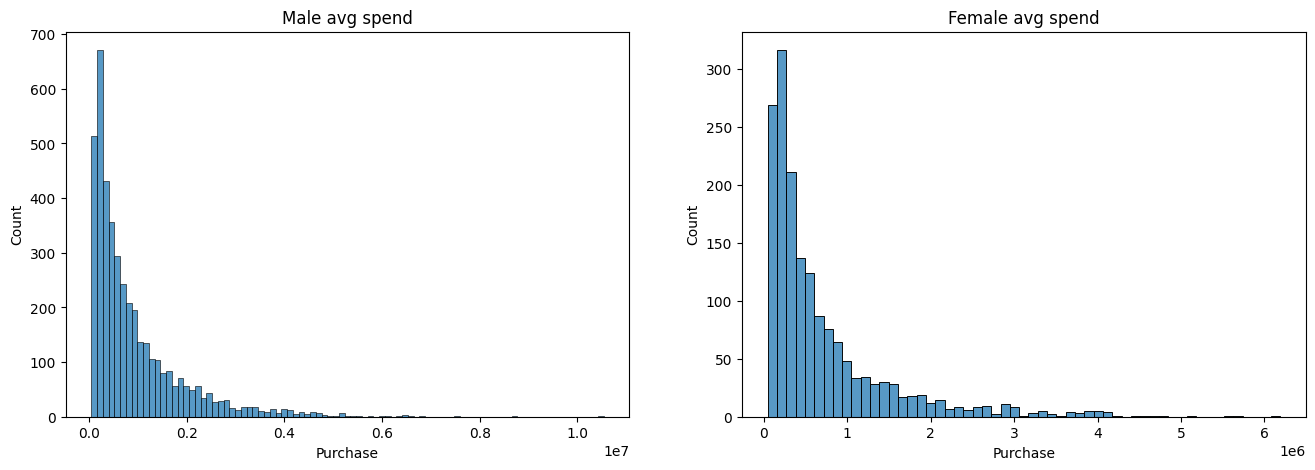

In [ ]:
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
sns.histplot(avg_gender[avg_gender['Gender']=='M']['Purchase'],ax=axis[0]).set_title('Male avg spend')
sns.histplot(avg_gender[avg_gender['Gender']=='F']['Purchase'],ax=axis[1]).set_title('Female avg spend')

In [ ]:
avg_gender.groupby('Gender')['Purchase'].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [ ]:
avg_gender.groupby('Gender')['Purchase'].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


1. Average amount for the males is 925344 for the entire population whereas it's much lesser for females(712024).
2. Total amount spend by males is around 4 billion whereas for females it's 1.2 billion.  

In [ ]:
avg_male=avg_gender[avg_gender['Gender']=='M']
avg_female=avg_gender[avg_gender['Gender']=='F']

In [ ]:
pop_male_mean=avg_male['Purchase'].mean()
pop_female_mean=avg_female['Purchase'].mean()

In [ ]:
male_means=[]
female_means=[]
repetition=1000
sample_size=1000
for i in range(repetition):
  male_mean=avg_male.sample(sample_size,replace=True)['Purchase'].mean()
  male_means.append(male_mean)
  female_mean=avg_female.sample(sample_size,replace=True)['Purchase'].mean()
  female_means.append(female_mean)

Text(0.5, 1.0, 'Female Means for 1000 sample size')

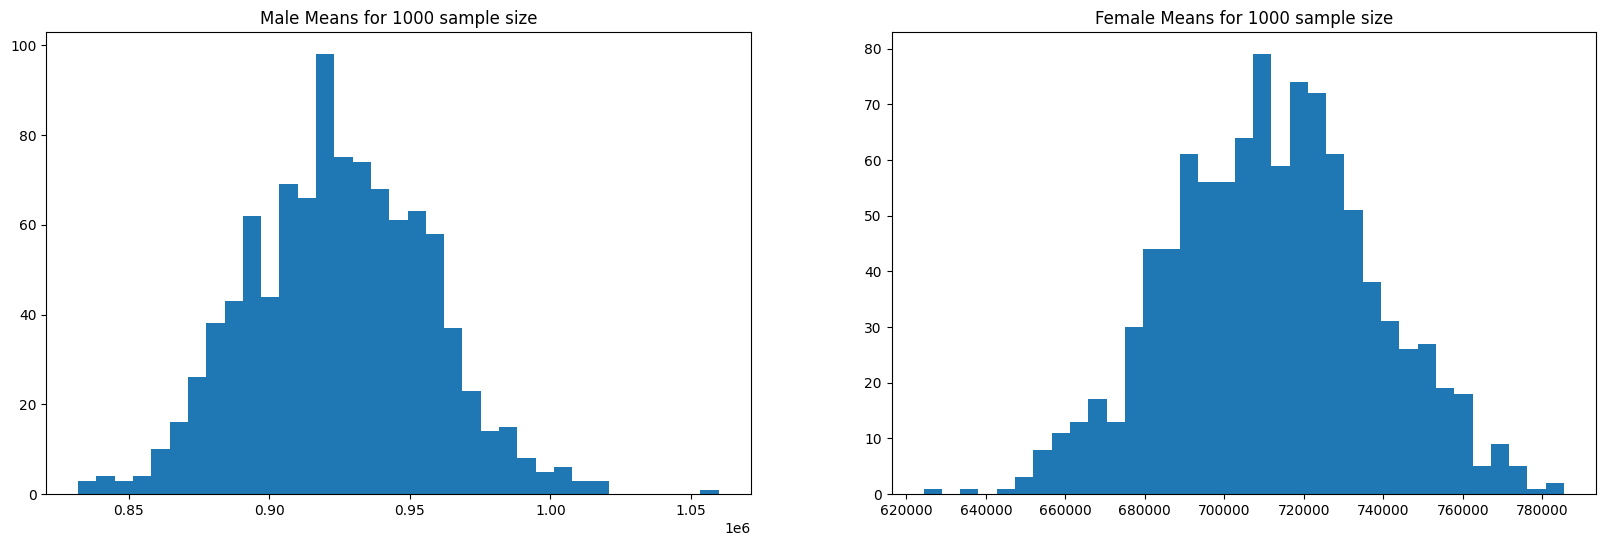

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax[0].hist(male_means,bins=35)
ax[0].set_title('Male Means for 1000 sample size')
ax[1].hist(female_means,bins=35)
ax[1].set_title('Female Means for 1000 sample size')

    1. The means sample seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [ ]:
#Calculating 90% confidence interval for sample size 1000:

In [ ]:
from scipy.stats import norm

In [ ]:
norm.ppf(1-0.05)

1.6448536269514722

In [ ]:
z90=1.645

In [ ]:
sample_mean_male=np.array(male_means).mean()
sample_mean_female=np.array(female_means).mean()

In [ ]:
std_error_male=(pd.Series(male_means).std())/np.sqrt(1000)
std_error_female=(pd.Series(female_means).std())/np.sqrt(1000)

In [ ]:
lower_limit_male=sample_mean_male-z90*std_error_male
upper_limit_male=sample_mean_male+z90*std_error_male

In [ ]:
lower_limit_female=sample_mean_female-z90*std_error_female
upper_limit_female=sample_mean_female+z90*std_error_female

In [ ]:
print("Population avg spend amount for Male: ",pop_male_mean)
print("Population avg spend amount for Female: ",pop_female_mean)
print()
print("Sample avg spend amount for Male: ",sample_mean_male)
print("Sample avg spend amount for Female: ",sample_mean_female)
print()
print("Sample std for Male: ",(pd.Series(male_means).std()))
print("Sample std for Female: ",(pd.Series(female_means).std()))
print()
print("Sample std error for Male: ",std_error_male)
print("Sample std error for Female: ",std_error_female)
print()
print("Male_CI: ",[lower_limit_male,upper_limit_male])
print("Female_CI: ",[lower_limit_female,upper_limit_female])


Population avg spend amount for Male:  925344.4023668639
Population avg spend amount for Female:  712024.3949579832

Sample avg spend amount for Male:  925234.62572
Sample avg spend amount for Female:  711981.4638429999

Sample std for Male:  32080.421153276697
Sample std for Female:  25633.507417102235

Sample std error for Male:  1014.4719914180001
Sample std error for Female:  810.6026785686286

Male_CI:  [923565.8192941174, 926903.4321458826]
Female_CI:  [710648.0224367545, 713314.9052492452]


Now using the Confidence interval at 90%, we can say that:

Average amount spend by male customers lie in the range 923565.8192941174- 926903.4321458826

Average amount spend by female customers lie in range 710648.0224367545 - 713314.9052492452

Calculating 95% confidence interval for sample size 1000:

In [ ]:
norm.ppf(1-0.025)

1.959963984540054

In [ ]:
z95=1.960

In [ ]:
sample_mean_male=np.array(male_means).mean()
sample_mean_female=np.array(female_means).mean()

In [ ]:
std_male=pd.Series(male_means).std()
std_female=pd.Series(female_means).std()

In [ ]:
std_error_male=std_male/np.sqrt(1000)
std_error_female=std_female/np.sqrt(1000)

In [ ]:
lower_limit_male=sample_mean_male-z95*std_error_male
upper_limit_male=sample_mean_male+z95*std_error_male

In [ ]:
lower_limit_female=sample_mean_female-z95*std_error_female
upper_limit_female=sample_mean_female+z95*std_error_female

In [ ]:
print("Population avg spend amount for Male: ",pop_male_mean)
print("Population avg spend amount for Female: ",pop_female_mean)
print()
print("Sample avg spend amount for Male: ",sample_mean_male)
print("Sample avg spend amount for Female: ",sample_mean_female)
print()
print("Sample std for Male: ",std_male)
print("Sample std for Female: ",std_female)
print()
print("Sample std error for Male: ",std_error_male)
print("Sample std error for Female: ",std_error_female)
print()
print("Male_CI: ",[lower_limit_male,upper_limit_male])
print("Female_CI: ",[lower_limit_female,upper_limit_female])

Population avg spend amount for Male:  925344.4023668639
Population avg spend amount for Female:  712024.3949579832

Sample avg spend amount for Male:  925234.62572
Sample avg spend amount for Female:  711981.4638429999

Sample std for Male:  32080.421153276697
Sample std for Female:  25633.507417102235

Sample std error for Male:  1014.4719914180001
Sample std error for Female:  810.6026785686286

Male_CI:  [923246.2606168208, 927222.9908231793]
Female_CI:  [710392.6825930054, 713570.2450929944]


Observation:

Now using the Confidence interval at 95%, we can say that:

Average amount spend by male customers lie in the range 923246.2606168208 - 927222.9908231793

Average amount spend by female customers lie in range 710392.6825930054 -  713570.2450929944

Calculating 99% confidence interval for sample size 1000:

In [ ]:
norm.ppf(1-0.005)

2.5758293035489004

In [ ]:
z99=2.576

In [ ]:
sample_mean_male=np.array(male_means).mean()
sample_mean_female=np.array(female_means).mean()

In [ ]:
std_male=pd.Series(male_means).std()
std_female=pd.Series(female_means).std()

In [ ]:
std_error_male=std_male/np.sqrt(1000)
std_error_female=std_female/np.sqrt(1000)

In [ ]:
lower_limit_male=sample_mean_male-z99*std_error_male
upper_limit_male=sample_mean_male+z99*std_error_male

In [ ]:
lower_limit_female=sample_mean_female-z99*std_error_female
upper_limit_female=sample_mean_female+z99*std_error_female

In [ ]:
print("Population avg spend amount for Male: ",pop_male_mean)
print("Population avg spend amount for Female: ",pop_female_mean)
print()
print("Sample avg spend amount for Male: ",sample_mean_male)
print("Sample avg spend amount for Female: ",sample_mean_female)
print()
print("Sample std for Male: ",std_male)
print("Sample std for Female: ",std_female)
print()
print("Sample std error for Male: ",std_error_male)
print("Sample std error for Female: ",std_error_female)
print()
print("Male_CI: ",[lower_limit_male,upper_limit_male])
print("Female_CI: ",[lower_limit_female,upper_limit_female])

Population avg spend amount for Male:  925344.4023668639
Population avg spend amount for Female:  712024.3949579832

Sample avg spend amount for Male:  925234.62572
Sample avg spend amount for Female:  711981.4638429999

Sample std for Male:  32080.421153276697
Sample std for Female:  25633.507417102235

Sample std error for Male:  1014.4719914180001
Sample std error for Female:  810.6026785686286

Male_CI:  [922621.3458701073, 927847.9055698927]
Female_CI:  [709893.3513430071, 714069.5763429927]


Observation:

Now using the Confidence interval at 99%, we can say that:

Average amount spend by male customers lie in the range 922621.3458701073 - 927847.9055698927

Average amount spend by female customers lie in range 709893.3513430071 - 714069.5763429927

#CLT and Confidence interval considering marital status:

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
avg_marital_status=df.groupby(['User_ID','Marital_Status'])[['Purchase']].sum()

In [ ]:
avg_marital=avg_marital_status.reset_index()

In [ ]:
avg_marital

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
avg_marital['Marital_Status'].value_counts()

,count
Marital_Status,
0,3417
1,2474


Text(0.5, 1.0, 'Distribution of married')

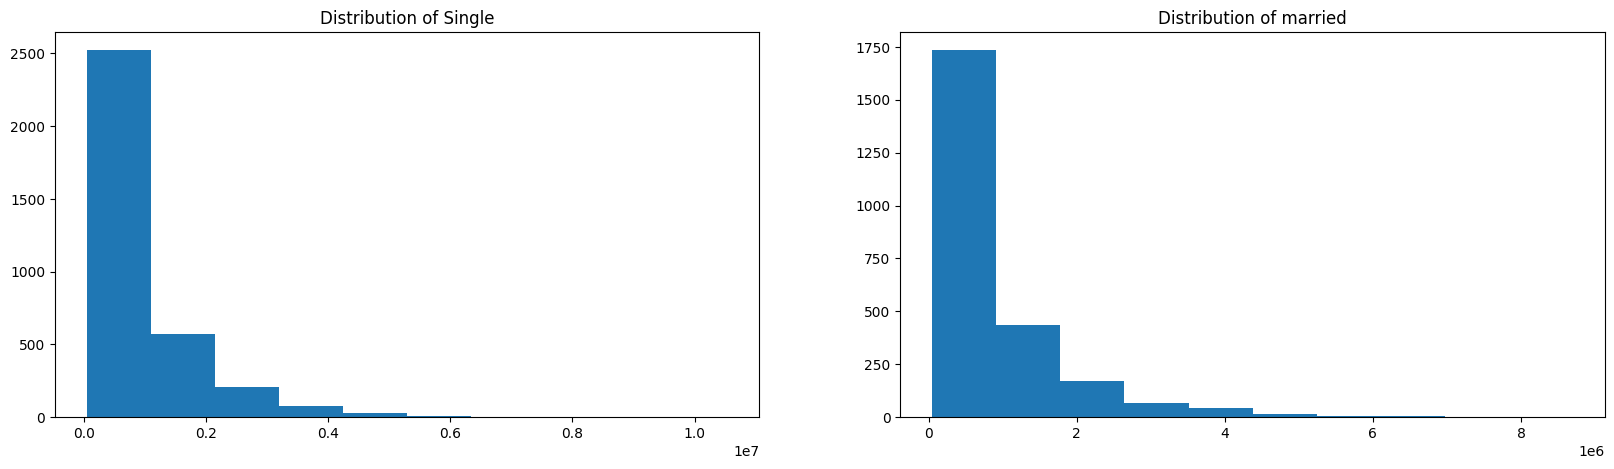

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax[0].hist(avg_marital[avg_marital['Marital_Status']==0]['Purchase'],bins=10)
ax[0].set_title('Distribution of Single')
ax[1].hist(avg_marital[avg_marital['Marital_Status']==1]['Purchase'],bins=10)
ax[1].set_title('Distribution of married')

In [ ]:
single=avg_marital[avg_marital['Marital_Status']==0]
married=avg_marital[avg_marital['Marital_Status']==1]

In [ ]:
pop_single=single['Purchase'].mean()
pop_married=married['Purchase'].mean()

In [ ]:
married_means=[]
single_means=[]
repetition=1000
sample_size=1000
for i in range(repetition):
  single_mean=single.sample(sample_size,replace=True)['Purchase'].mean()
  single_means.append(single_mean)
  married_mean=married.sample(sample_size,replace=True)['Purchase'].mean()
  married_means.append(married_mean)

In [ ]:
len(single_means)

1000

In [ ]:
len(married_means)

1000

Text(0.5, 1.0, 'Distribution of married in 1000 sample')

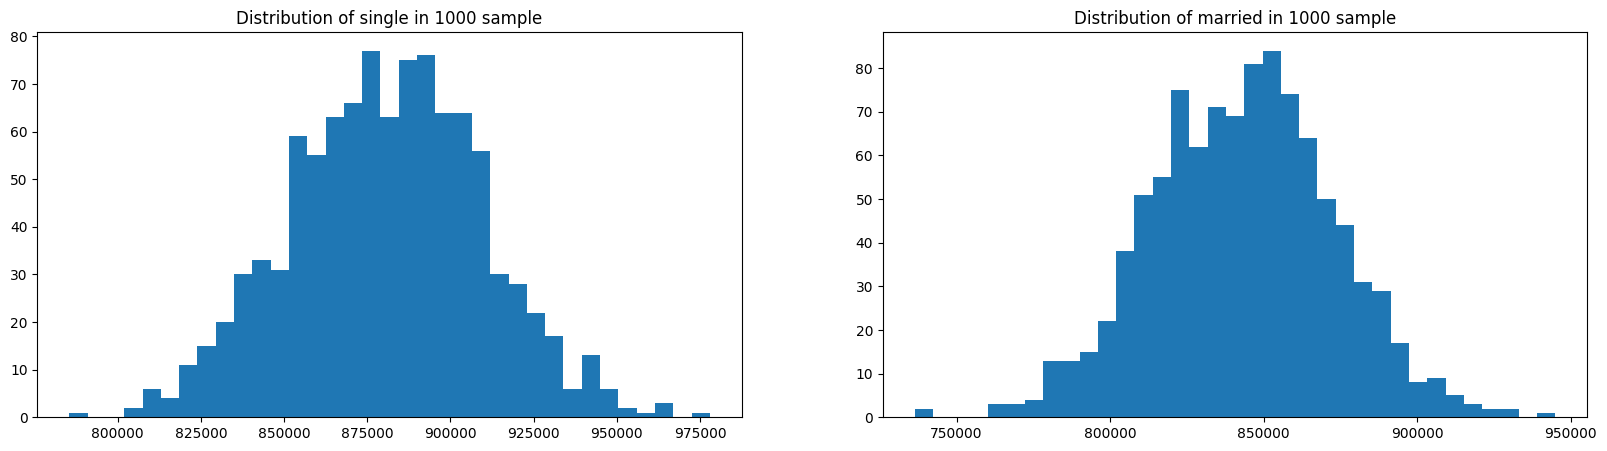

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax[0].hist(single_means,bins=35)
ax[0].set_title('Distribution of single in 1000 sample')
ax[1].hist(married_means,bins=35)
ax[1].set_title('Distribution of married in 1000 sample')

The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [ ]:
avg_marital['Marital_Status'].value_counts()

,count
Marital_Status,
0,3417
1,2474


Calculating 90% confidence interval for avg expenses for married/single for sample size 1000:

In [ ]:
norm.ppf(1-0.05)

1.6448536269514722

In [ ]:
z90=1.645

In [ ]:
sample_mean_single=np.array(single_means).mean()
sample_mean_married=np.array(married_means).mean()

In [ ]:
std_single=pd.Series(single_means).std()
std_married=pd.Series(married_means).std()

In [ ]:
std_error_single=std_single/np.sqrt(1000)
std_error_married=std_married/np.sqrt(1000)

In [ ]:
lower_limit_single=sample_mean_single-z90*std_error_single
upper_limit_single=sample_mean_single+z90*std_error_single

In [ ]:
lower_limit_married=sample_mean_married-z90*std_error_married
upper_limit_married=sample_mean_married+z90*std_error_married

In [ ]:
print("Population avg spend amount for Married: ",pop_married)
print("Population avg spend amount for Single: ",pop_single)
print()
print("Sample avg spend amount for Married: ",sample_mean_married)
print("Sample avg spend amount for Single: ",sample_mean_single)
print()
print("Sample std for Married: ",std_married)
print("Sample std for Single: ",std_single)
print()
print("Sample std error for Married: ",std_error_married)
print("Sample std error for Single: ",std_error_single)
print()
print("Married_CI: ",[lower_limit_married,upper_limit_married])
print("Single_CI: ",[lower_limit_single,upper_limit_single])

Population avg spend amount for Married:  843526.7966855295
Population avg spend amount for Single:  880575.7819724905

Sample avg spend amount for Married:  843122.561752
Sample avg spend amount for Single:  880889.945671

Sample std for Married:  29560.62268687337
Sample std for Single:  28984.923847616476

Sample std error for Married:  934.7889674336623
Sample std error for Single:  916.5837716499929

Married_CI:  [841584.8339005717, 844660.2896034283]
Single_CI:  [879382.1653666358, 882397.7259753643]


Calculating 95% confidence interval for avg expenses for married/single for sample size 1000:

In [ ]:
norm.ppf(1-0.025)

1.959963984540054

In [ ]:
z95=1.960

In [ ]:
sample_mean_single=np.array(single_means).mean()
sample_mean_married=np.array(married_means).mean()

In [ ]:
std_single=pd.Series(single_means).std()
std_married=pd.Series(married_means).std()

In [ ]:
std_error_single=std_single/np.sqrt(1000)
std_error_married=std_married/np.sqrt(1000)

In [ ]:
lower_limit_single=sample_mean_single-z95*std_error_single
upper_limit_single=sample_mean_single+z95*std_error_single

In [ ]:
lower_limit_married=sample_mean_married-z95*std_error_married
upper_limit_married=sample_mean_married+z95*std_error_married

In [ ]:
print("Population avg spend amount for Married: ",pop_married)
print("Population avg spend amount for Single: ",pop_single)
print()
print("Sample avg spend amount for Married: ",sample_mean_married)
print("Sample avg spend amount for Single: ",sample_mean_single)
print()
print("Sample std for Married: ",std_married)
print("Sample std for Single: ",std_single)
print()
print("Sample std error for Married: ",std_error_married)
print("Sample std error for Single: ",std_error_single)
print()
print("Married_CI: ",[lower_limit_married,upper_limit_married])
print("Single_CI: ",[lower_limit_single,upper_limit_single])

Population avg spend amount for Married:  843526.7966855295
Population avg spend amount for Single:  880575.7819724905

Sample avg spend amount for Married:  843122.561752
Sample avg spend amount for Single:  880889.945671

Sample std for Married:  29560.62268687337
Sample std for Single:  28984.923847616476

Sample std error for Married:  934.7889674336623
Sample std error for Single:  916.5837716499929

Married_CI:  [841290.37537583, 844954.74812817]
Single_CI:  [879093.441478566, 882686.4498634341]


Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:

In [ ]:
norm.ppf(1-0.005)

2.5758293035489004

In [ ]:
z99=2.576

In [ ]:
sample_mean_single=np.array(single_means).mean()
sample_mean_married=np.array(married_means).mean()


In [ ]:
std_single=pd.Series(single_means).std()
std_married=pd.Series(married_means).std()

In [ ]:
std_error_single=std_single/np.sqrt(1000)
std_error_married=std_married/np.sqrt(1000)

In [ ]:
lower_limit_single=sample_mean_single-z99*std_error_single
upper_limit_single=sample_mean_single+z99*std_error_single

In [ ]:
lower_limit_married=sample_mean_married-z99*std_error_married
upper_limit_married=sample_mean_married+z99*std_error_married

In [ ]:
print("Population avg spend amount for Married: ",pop_married)
print("Population avg spend amount for Single: ",pop_single)
print()
print("Sample avg spend amount for Married: ",sample_mean_married)
print("Sample avg spend amount for Single: ",sample_mean_single)
print()
print("Sample std for Married: ",std_married)
print("Sample std for Single: ",std_single)
print()
print("Sample std error for Married: ",std_error_married)
print("Sample std error for Single: ",std_error_single)
print()
print("Married_CI: ",[lower_limit_married,upper_limit_married])
print("Single_CI: ",[lower_limit_single,upper_limit_single])

Population avg spend amount for Married:  843526.7966855295
Population avg spend amount for Single:  880575.7819724905

Sample avg spend amount for Married:  843122.561752
Sample avg spend amount for Single:  880889.945671

Sample std for Married:  29560.62268687337
Sample std for Single:  28984.923847616476

Sample std error for Married:  934.7889674336623
Sample std error for Single:  916.5837716499929

Married_CI:  [840714.5453718909, 845530.5781321091]
Single_CI:  [878528.8258752297, 883251.0654667704]


For married and singles, it can be seen with larger sample size the sample mean gets closer to tthe population mean. And at greater confidence interval, the range increases.



In [ ]:
avg_age=df.groupby(['User_ID','Age'])['Purchase'].sum()

In [ ]:
avg_age=avg_age.reset_index()

In [ ]:
avg_age['Age'].value_counts()

,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


In [ ]:
repetition=1000
sample_size=200
all_sample_means={}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

for i in age_intervals:
  all_sample_means[i]=[]

for i in age_intervals:
  for j in range(repetition):
    sample_mean=avg_age[avg_age['Age']==i].sample(sample_size,replace=True)['Purchase'].mean()
    all_sample_means[i].append(sample_mean)


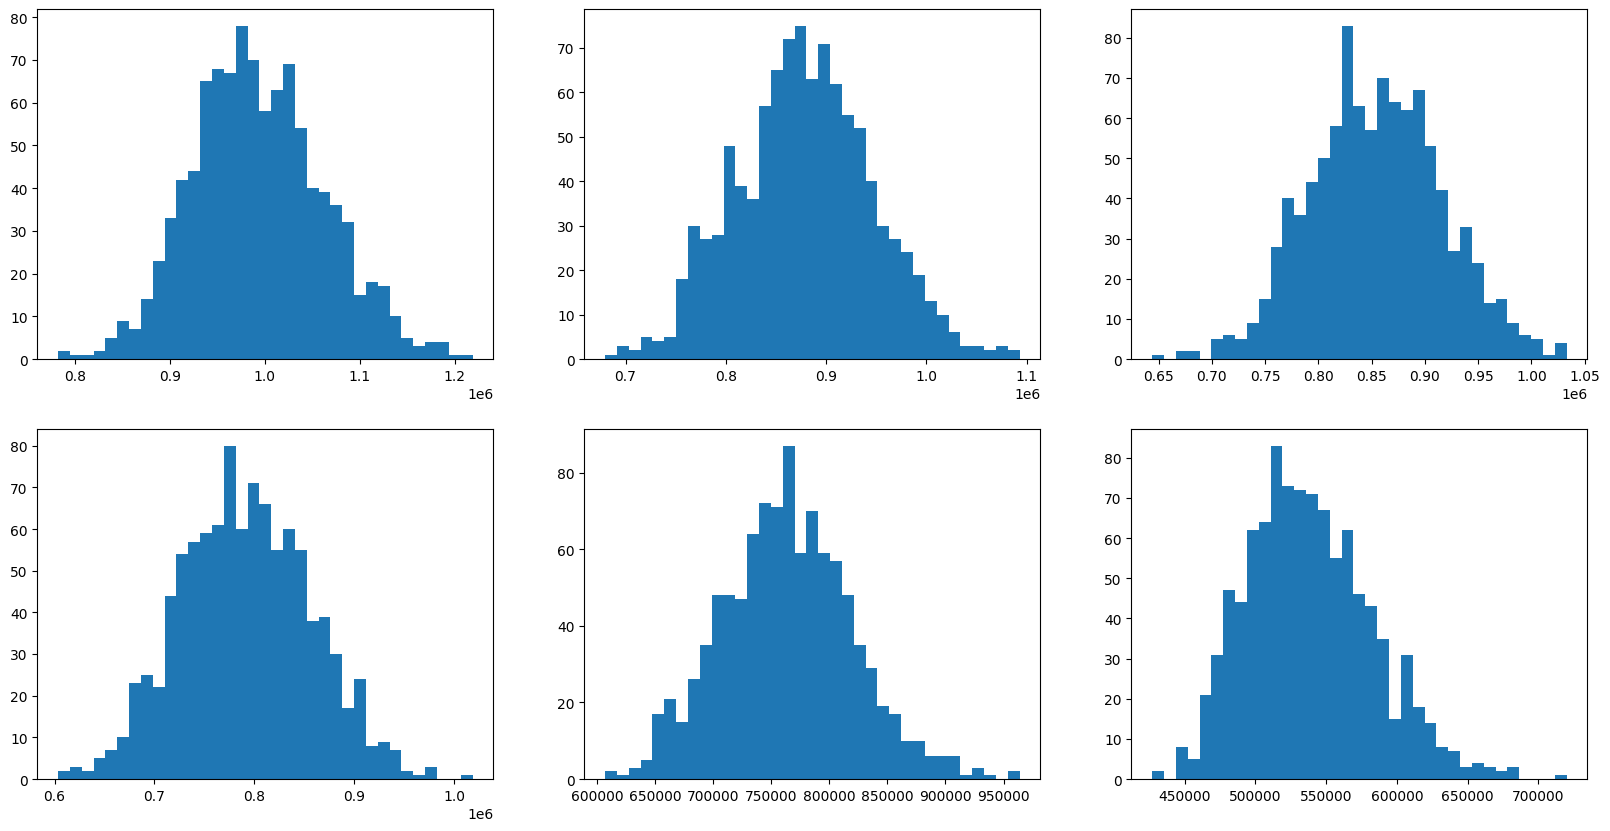

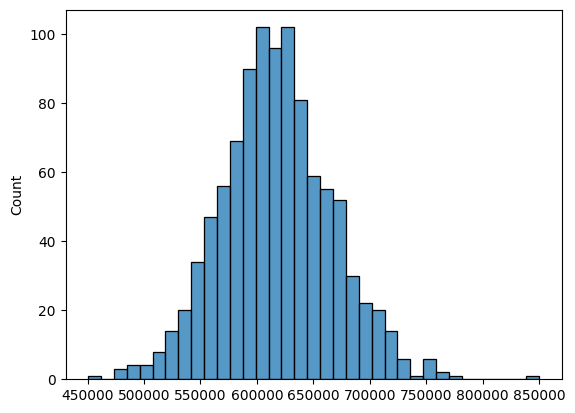

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
ax[0,0].hist(all_sample_means['26-35'],bins=35)
ax[0,1].hist(all_sample_means['36-45'],bins=35)
ax[0,2].hist(all_sample_means['18-25'],bins=35)
ax[1,0].hist(all_sample_means['46-50'],bins=35)
ax[1,1].hist(all_sample_means['51-55'],bins=35)
ax[1,2].hist(all_sample_means['55+'],bins=35)
plt.show()
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()

The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

:Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:

In [ ]:
z90=1.645

In [ ]:
all_samples_mean={}
population_mean={}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
repetition=1000
sample_size=200
for i in age_intervals:
  all_samples_mean[i]=[]
  population_mean[i]=[]

for i in age_intervals:
  pop_mean=avg_age[avg_age['Age']==i]['Purchase'].mean()
  population_mean[i].append(pop_mean)

for i in age_intervals:
  for j in range(repetition):
    mean=avg_age[avg_age['Age']==i].sample(sample_size,replace=True)['Purchase'].mean()
    all_samples_mean[i].append(mean)

{'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}




In [ ]:
print(population_mean)
print('\n')
print()
for i in age_intervals:
  sample_mean=np.array(all_samples_mean[i]).mean()
  std_error=(pd.Series(all_samples_mean[i]).std())/np.sqrt(200)
  lower_limit=sample_mean-z90*std_error
  upper_limit=sample_mean+z90*std_error
  print("For",i,": ",[lower_limit,upper_limit])

{'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}



For 26-35 :  [981102.4647896584, 998128.1702903415]
For 36-45 :  [871142.5718559374, 887054.0518640627]
For 18-25 :  [847300.7119035354, 861508.0418664647]
For 46-50 :  [788579.0737323253, 804137.6377476747]
For 51-55 :  [754904.2284039711, 767762.4400360291]
For 55+ :  [534627.4355172839, 544943.6604127162]
For 0-17 :  [615119.5722573573, 626092.5489526425]


Calculating 95% confidence interval for avg expenses for different age groups for sample size 200:

In [ ]:
norm.ppf(1-0.025)

1.959963984540054

In [ ]:
z95=1.960

In [ ]:
repetition=1000
sample_size=200
all_samples_mean={}
all_population_mean={}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
  all_samples_mean[i]=[]
  all_population_mean[i]=[]

for i in age_intervals:
  pop_mean=avg_age[avg_age['Age']==i]['Purchase'].mean()
  all_population_mean[i].append(pop_mean)

for i in age_intervals:
  for j in range(repetition):
    mean=avg_age[avg_age['Age']==i].sample(sample_size,replace=True)['Purchase'].mean()
    all_samples_mean[i].append(mean)

In [ ]:
print(all_population_mean)
print('\n')
print()
for i in age_intervals:
  sample_mean=np.array(all_samples_mean[i]).mean()
  std_error=(pd.Series(all_samples_mean[i]).std())/np.sqrt(200)
  lower_limit=sample_mean-z95*std_error
  upper_limit=sample_mean+z95*std_error
  print('For',i,": ",[lower_limit,upper_limit])

{'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}



For 26-35 :  [981209.7183145263, 1001957.9825354737]
For 36-45 :  [872199.4757531948, 891267.0353068052]
For 18-25 :  [845970.7275795733, 863467.2605004268]
For 46-50 :  [784850.3404262447, 803030.9122037553]
For 51-55 :  [759560.048571604, 774840.2687483962]
For 55+ :  [534488.3838668934, 546467.6234231065]
For 0-17 :  [613972.9129098709, 627727.0757401293]


Calculating 99% confidence interval for avg expenses for different age groups for sample size 200:

In [ ]:
norm.ppf(1-0.005)

2.5758293035489004

In [ ]:
z99=2.576

In [ ]:
sample_size=200
repetition=1000
all_samples_mean={}
population_mean={}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
  all_samples_mean[i]=[]
  population_mean[i]=[]

for i in age_intervals:
  pop_mean=avg_age[avg_age['Age']==i]['Purchase'].mean()
  population_mean[i].append(pop_mean)

for i in age_intervals:
  for j in range(repetition):
    mean=avg_age[avg_age['Age']==i].sample(sample_size,replace=True)['Purchase'].mean()
    all_samples_mean[i].append(mean)

In [ ]:
print(population_mean)
print("/n")
print()
for i in age_intervals:
  sample_mean=np.array(all_samples_mean[i]).mean()
  std_error=(pd.Series(all_samples_mean[i]).std())/np.sqrt(200)
  lower_limit=sample_mean-z99*std_error
  upper_limit=sample_mean+z99*std_error
  print('For',i,": ",[lower_limit,upper_limit])

{'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}
/n

For 26-35 :  [977734.7625306197, 1004772.4508693803]
For 36-45 :  [870346.2649869309, 894339.0092430692]
For 18-25 :  [842160.6274487763, 865536.1988912239]
For 46-50 :  [781191.8201010365, 805708.5988289637]
For 51-55 :  [753783.4766311639, 774733.0622888361]
For 55+ :  [530511.9036193712, 545904.5196106288]
For 0-17 :  [609906.1412507263, 627229.3668592738]


 1.Are women spending more money per transaction than men? Why or Why not?
    
    Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).
    
    The reason for less purchase by women could have several factors:

      Males might be doing the purchase for females.
      Salary can be a factor in less purchase.
      We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
      If the female based products quality/quantity needs to be improved for women purchasing.
    
    2. Confidence intervals and distribution of the mean of the expenses by female and male customers.
    
    At 99% Confidence Interval with sample size 1000
    
    Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61

    Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31
    
    
    3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
    
    Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.
    
